<a href="https://colab.research.google.com/github/joaquinparodi/TP1-DATOS/blob/main/tp1orga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
!pip install ptitprince
import ptitprince as pt
import pandas as pd
import numpy as np


In [132]:
import matplotlib.pylab as plt
import seaborn as sns

In [133]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [135]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [136]:
 
id='1aIyEwjxvHeljU-gu-iQMlHI596nZRPFJ'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('data.csv')

In [137]:
#1)Apertura
entrenamiento = pd.read_csv('data.csv')
entrenamiento.tail(5)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,4/4/2016,4/8/2016,2016 - 4,Q2,2016,NaT,0,EUR,93015.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16944,8792,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/28/2016,3/31/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16945,28561,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,10/20/2015,None,United States,Account_Name_944,Opportunity_Name_5843,12802,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,2/29/2016,1/22/2016,Person_Name_3,Product_Family_158,Product_Name_287,USD,0.6375,USD,0.63750,4/25/2016,4/29/2016,2016 - 4,Q2,2016,NaT,4,USD,2346796.88,USD,0.0,Closed Lost,Prod_Category_A_None
16946,28318,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,9/3/2015,None,United States,Account_Name_1401,Opportunity_Name_9911,12803,None,Person_Name_3,Person_Name_3,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_4,12/5/2015,None,None,None,None,None,None,NaT,1/6/2016,9/28/2016,Person_Name_3,Product_Family_164,Product_Name_307,USD,0.6400,USD,0.64000,7/1/2016,8/31/2016,2016 - 7,Q3,2016,NaT,40,USD,25603200.00,USD,0.0,Closed Lost,Prod_Category_A_None


In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [138]:
entrenamiento=entrenamiento
entrenamiento['Month']=pd.to_datetime(entrenamiento['Month'])
entrenamiento['anio']=entrenamiento['Month'].dt.year
entrenamiento['mes']=entrenamiento['Month'].dt.month

In [ ]:
#vemos que por cada oportunidad tenemos un solo termino de envio
entrenamiento.groupby(['Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count')).sample(10)

,,,cantidad
Opportunity_Name,Delivery_Terms,Stage,
Opportunity_Name_12348,Delivery_Terms_2,Closed Won,1
Opportunity_Name_7004,Delivery_Terms_4,Closed Lost,6
Opportunity_Name_5403,Delivery_Terms_1,Closed Won,1
Opportunity_Name_12341,Delivery_Terms_2,Closed Won,2
Opportunity_Name_6036,Delivery_Terms_4,Closed Lost,1
Opportunity_Name_8896,Delivery_Terms_1,Closed Lost,1
Opportunity_Name_10565,Delivery_Terms_4,Closed Lost,6
Opportunity_Name_5428,Delivery_Terms_1,Closed Won,1
Opportunity_Name_3579,Delivery_Terms_2,Closed Won,1


In [139]:
entrenamiento=entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' ) | (entrenamiento['Stage']=='Closed Won'),: ]

#cantidad de oportunidades por termino de envio

In [140]:
opportunity_deliverTerms_stage=entrenamiento.groupby(['Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['Opportunity_Name','Delivery_Terms','Stage']]
opportunity_deliverTerms_stage.head(2)

,Opportunity_Name,Delivery_Terms,Stage
0,Opportunity_Name_0,Delivery_Terms_4,Closed Lost
1,Opportunity_Name_1,Delivery_Terms_4,Closed Lost


In [141]:
#voy a filtrar por los terminos que tengan mas de 40 casos de oportunidad dentro de cada termino
opportunity_deliverTerms_stage.groupby(['Delivery_Terms']).size()

Delivery_Terms
Delivery_Terms_0       4
Delivery_Terms_1    1985
Delivery_Terms_2    3218
Delivery_Terms_3      32
Delivery_Terms_4    3446
Delivery_Terms_5     522
Delivery_Terms_6     434
Delivery_Terms_7      36
Delivery_Terms_8     114
dtype: int64

In [142]:
#ya filtrado
opportunity_deliverTerms_stage=opportunity_deliverTerms_stage.groupby(['Delivery_Terms']).filter(lambda x: x['Opportunity_Name'].count()>40)
opportunity_deliverTerms_stage.head(1)

,Opportunity_Name,Delivery_Terms,Stage
0,Opportunity_Name_0,Delivery_Terms_4,Closed Lost


In [143]:
opportunity_deliverTerms=opportunity_deliverTerms_stage.groupby( 'Delivery_Terms').agg(cantidad_oportunidades=('Delivery_Terms','count')).reset_index()
opportunity_deliverTerms.head(10)

,Delivery_Terms,cantidad_oportunidades
0,Delivery_Terms_1,1985
1,Delivery_Terms_2,3218
2,Delivery_Terms_4,3446
3,Delivery_Terms_5,522
4,Delivery_Terms_6,434
5,Delivery_Terms_8,114


Text(0, 0.5, ' \tDelivery_Terms')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


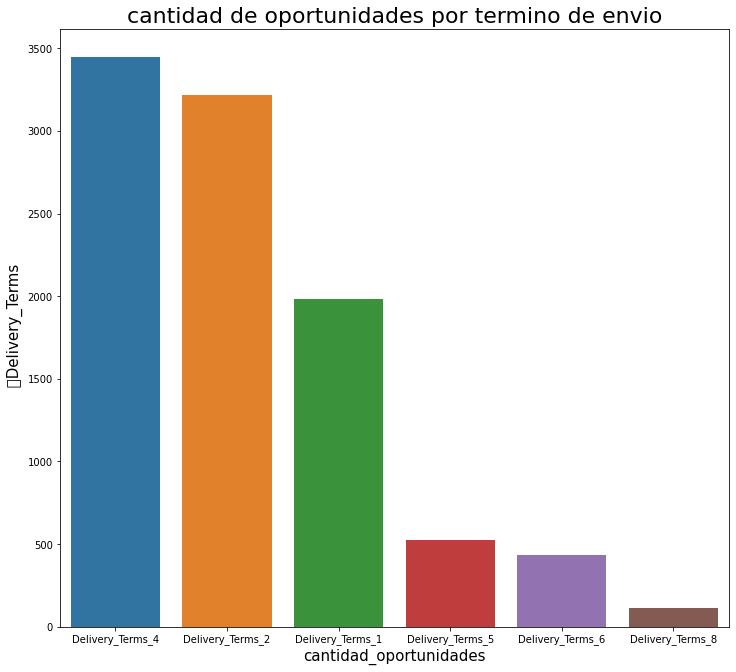

In [144]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.barplot(data=opportunity_deliverTerms.nlargest(10,'cantidad_oportunidades'), x="Delivery_Terms", y="cantidad_oportunidades",ax=ax)
g.set_title("cantidad de oportunidades por termino de envio", fontsize=22)
g.set_xlabel("cantidad_oportunidades",fontsize=15)
g.set_ylabel(" 	Delivery_Terms", fontsize=15)

#tasa de closed won por termino de envio y Cantidad de stage por tipo de termino de delivery



In [ ]:
opportunity_deliverTerms_stage=entrenamiento.groupby(['Opportunity_Name','Delivery_Terms','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['Opportunity_Name','Delivery_Terms','Stage']]
 


In [ ]:
opportunity_deliverTerms_stage=opportunity_deliverTerms_stage.groupby(['Delivery_Terms']).filter(lambda x: x['Opportunity_Name'].count()>40)


In [145]:
opportunity_deliverTerms_stage.groupby(['Delivery_Terms'])['Delivery_Terms'].transform('size')

0       3446
1       3446
2       3218
3        522
4        114
        ... 
9786    3446
9787    3446
9788    3218
9789    1985
9790    3446
Name: Delivery_Terms, Length: 9719, dtype: int64

In [146]:
opportunity_deliverTerms_stage.groupby(['Delivery_Terms','Stage'])['Stage'].size()

Delivery_Terms    Stage      
Delivery_Terms_1  Closed Lost    1092
                  Closed Won      893
Delivery_Terms_2  Closed Lost    1674
                  Closed Won     1544
Delivery_Terms_4  Closed Lost    1561
                  Closed Won     1885
Delivery_Terms_5  Closed Lost     174
                  Closed Won      348
Delivery_Terms_6  Closed Lost     133
                  Closed Won      301
Delivery_Terms_8  Closed Lost      49
                  Closed Won       65
Name: Stage, dtype: int64

In [147]:
cant_opportunity_deliverTerms=opportunity_deliverTerms_stage.groupby(['Delivery_Terms','Stage'])\
.agg(cantidad=('Stage','count')).unstack()
cant_opportunity_deliverTerms.columns=cant_opportunity_deliverTerms.columns.droplevel()

In [148]:
#conseguimos tasa por delivery terms
cant_opportunity_deliverTerms['tasa_won']=cant_opportunity_deliverTerms['Closed Won'] /(cant_opportunity_deliverTerms['Closed Lost']\
                                                                                        +cant_opportunity_deliverTerms[ 'Closed Won' ] )
cant_opportunity_deliverTerms=cant_opportunity_deliverTerms.reset_index()

In [149]:
cant_opportunity_deliverTerms

Stage,Delivery_Terms,Closed Lost,Closed Won,tasa_won
0,Delivery_Terms_1,1092,893,0.449874
1,Delivery_Terms_2,1674,1544,0.479801
2,Delivery_Terms_4,1561,1885,0.547011
3,Delivery_Terms_5,174,348,0.666667
4,Delivery_Terms_6,133,301,0.693548
5,Delivery_Terms_8,49,65,0.570175


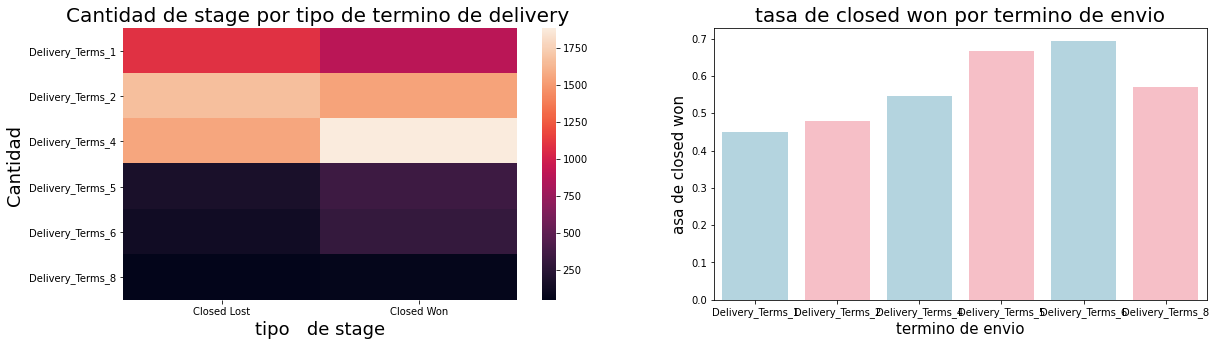

In [150]:
df=cant_opportunity_deliverTerms
df2=cant_opportunity_deliverTerms[['Delivery_Terms','Closed Lost','Closed Won']].set_index('Delivery_Terms')

fig, ax = plt.subplots(figsize=(30,11))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
ax1=plt.subplot(2, 3, 4)

 
#g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g = sns.heatmap(  data=df2,ax=ax1)
g.set_title("Cantidad de stage por tipo de termino de delivery ", fontsize=20)
g.set_xlabel("tipo   de stage", fontsize=18)
g.set_ylabel("Cantidad ", fontsize=18)

#ax1=plt.xticks(())
#ax1=plt.yticks(()) 


ax2=plt.subplot(2, 3, 5)
g = sns.barplot(x='Delivery_Terms', y='tasa_won',palette=["lightblue", "lightpink"] ,data=df,ax=ax2)
g.set_title("tasa de closed won por termino de envio", fontsize=20)
g.set_xlabel("termino de envio", fontsize=15)
g.set_ylabel("asa de closed won", fontsize=15)
#ax1=plt.xticks(())
#ax1=plt.yticks(())

 

plt.show()

**Vemos en general que el termino de envio elegido de los items son los termino1 , termino2 y termino 3 , ya que poseen mayor cantidad de itemsn oportunidad con stage del tipo closed won, esto debe ser por su flexibilidad o ventajas sobre el transporte del item, en especial el termino de envio 1 posee  aproximadamente  15 por ciento de closed lost, esto debe ser porque algun termino de envio no convencio al comprador**

## Afecta  el mes  para la tasa de negociacion de la venta  ?





In [ ]:
entrenamiento.groupby(['mes','Stage']).agg(cant=('ID','count'))

In [151]:
#vemos que cada mes puede tener muchas oportunidades- por lo tanto su stagte segun la oportunidad
entrenamiento[['mes','Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['mes','Opportunity_Name','Stage'])\
.agg(cantidad=('Stage','count')).head(10)

cantidad
mes Opportunity_Name       Stage                
1   Opportunity_Name_1000  Closed Lost         1
    Opportunity_Name_10020 Closed Lost         1
    Opportunity_Name_10023 Closed Won          1
    Opportunity_Name_10035 Closed Lost         1
    Opportunity_Name_10042 Closed Won          1
    Opportunity_Name_10050 Closed Won          1
    Opportunity_Name_10113 Closed Won          2
    Opportunity_Name_10114 Closed Won          4
    Opportunity_Name_10115 Closed Won          1
    Opportunity_Name_10130 Closed Won          1

In [152]:

mes_opportunity_stage=entrenamiento[['mes','Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['mes','Opportunity_Name','Stage'])\
.agg(cantidad=('Stage','count'))

In [153]:
mes_opportunity_stage=mes_opportunity_stage.reset_index()[['mes','Opportunity_Name','Stage']]

In [154]:
mes_cant_stage=mes_opportunity_stage.groupby(['mes','Stage']).agg(cantidad=('Stage','count')).unstack()
mes_cant_stage.columns=['Closed Lost','Closed Won']

In [155]:
tasa_mes_cant_stage= mes_cant_stage['Closed Won'] / (mes_cant_stage['Closed Lost'] + mes_cant_stage['Closed Won'])

In [156]:
tasa_mes_cant_stage=tasa_mes_cant_stage.to_frame()

In [157]:
tasa_mes_cant_stage.columns=['tasa_won']

In [158]:
tasa_mes_cant_stage=tasa_mes_cant_stage.reset_index()

Text(0, 0.5, ' Tasa Won ')

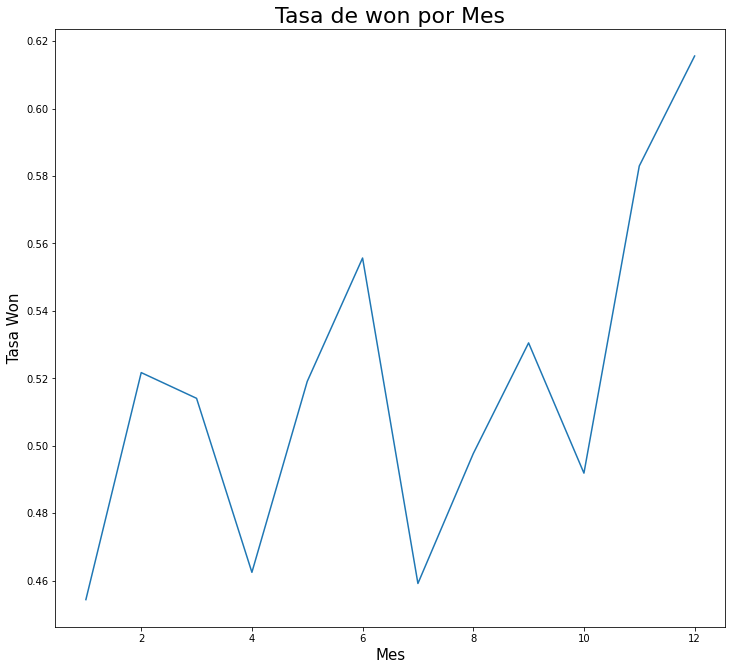

In [159]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=tasa_mes_cant_stage, x="mes", y="tasa_won",ax=ax)
g.set_title("Tasa de won por Mes", fontsize=22)
g.set_xlabel("Mes",fontsize=15)
g.set_ylabel(" Tasa Won ", fontsize=15)

**Se oberseva que la cantidad de stage de Negotiations , Proposal y Qualification no se utilizan para la venta del items, pero si vemos que los mas usados el stage closed lost y closed won, y en especial vemos que en el mes de diciembre la brecha entre estos ultimos se agranda, favoreciendo a que el items sea vendido( closed Won).**

## Afecta  el mes  para la negociacion(Stage) de la venta de la oportunidad?





In [ ]:
mes_opportunity_stage=entrenamiento[['mes','Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['mes','Opportunity_Name','Stage'])\
.agg(cantidad=('Stage','count'))\


In [ ]:
mes_opportunity_stage=mes_opportunity_stage.reset_index()[['mes','Opportunity_Name','Stage']].groupby(['mes','Stage']).agg(cantidad=('Stage','count')).reset_index()

In [ ]:
mes_opportunity_stage.head(2)

,mes,Stage,cantidad
0,1,Closed Lost,496
1,1,Closed Won,413


Text(0, 0.5, 'Cantidad de oportunidades por stage')

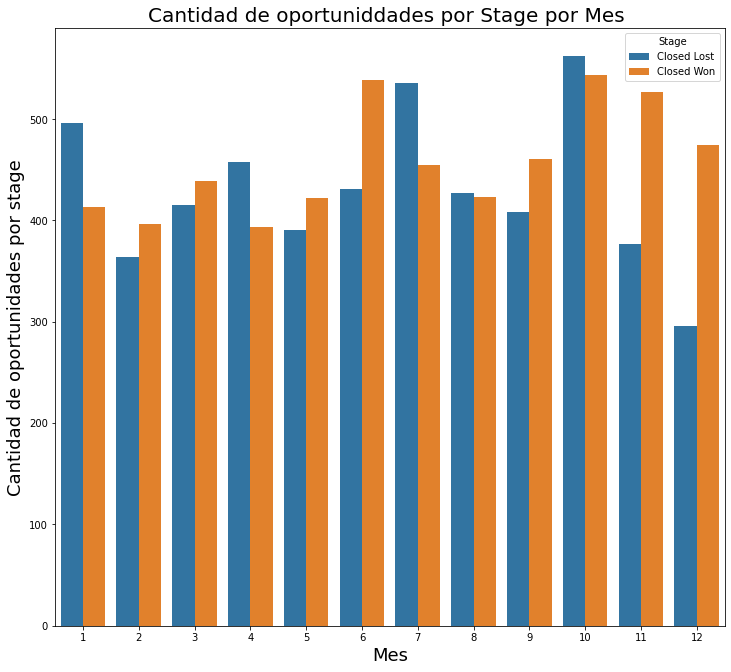

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
df= mes_opportunity_stage
g = sns.barplot(x=df['mes'], y=df['cantidad'],hue='Stage',data=df,ax=ax)
g.set_title("Cantidad de oportuniddades por Stage por Mes ", fontsize=20)
g.set_xlabel("Mes", fontsize=18)
g.set_ylabel("Cantidad de oportunidades por stage", fontsize=18)

#Cantidad de oportunidades por stage por anio  y Tasa de closed_won por Anio

In [167]:
anio_opportunity_stage=entrenamiento.groupby(['anio','Opportunity_Name','Stage']).agg(cantidad=('Stage','count'))\
.reset_index()[['anio','Opportunity_Name','Stage']]
 


In [162]:
opportunity_deliverTerms_stage

,anio,Opportunity_Name,Stage
0,2016,Opportunity_Name_0,Closed Lost
1,2016,Opportunity_Name_1,Closed Lost
2,2016,Opportunity_Name_1000,Closed Lost
3,2016,Opportunity_Name_10001,Closed Won
4,2016,Opportunity_Name_10005,Closed Lost
...,...,...,...
9850,2019,Opportunity_Name_9762,Closed Lost
9851,2019,Opportunity_Name_9835,Closed Won
9852,2019,Opportunity_Name_9909,Closed Lost
9853,2019,Opportunity_Name_9910,Closed Lost


In [168]:
anio_opportunity_stage.groupby(['anio']).size()
#se saca 2019 por pocos datos

anio
2016    2305
2017    3906
2018    3407
2019     237
dtype: int64

In [169]:
anio_opportunity_stage=anio_opportunity_stage.groupby(['anio']).filter(lambda x: x['Opportunity_Name'].count()>240)


In [174]:
 anio_opportunity_stage.head(2)

,anio,Opportunity_Name,Stage
0,2016,Opportunity_Name_0,Closed Lost
1,2016,Opportunity_Name_1,Closed Lost


In [180]:
cant_anio_opportunity_stage=anio_opportunity_stage.groupby(['anio','Stage'])\
.agg(cantidad=('Stage','count')).unstack()
cant_anio_opportunity_stage.columns=cant_anio_opportunity_stage.columns.droplevel()

In [181]:
#conseguimos tasa por delivery terms
cant_anio_opportunity_stage['tasa_won']=cant_anio_opportunity_stage['Closed Won'] /(cant_anio_opportunity_stage['Closed Lost']\
                                                                                        +cant_anio_opportunity_stage[ 'Closed Won' ] )
cant_anio_opportunity_stage=cant_anio_opportunity_stage.reset_index()

In [182]:
cant_anio_opportunity_stage

Stage,anio,Closed Lost,Closed Won,tasa_won
0,2016,1161,1144,0.496312
1,2017,1743,2163,0.553763
2,2018,1677,1730,0.507778


In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

In [185]:
df2=cant_anio_opportunity_stage[['anio','Closed Lost', 	'Closed Won']].set_index('anio')

Text(249.0, 0.5, 'anio ')

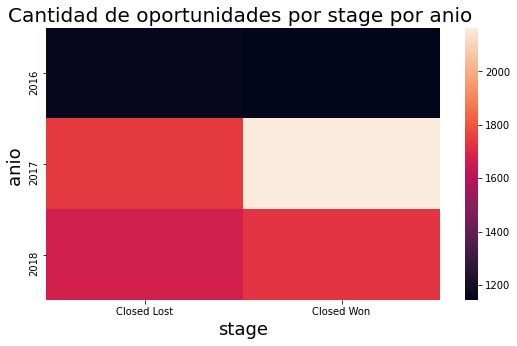

In [187]:

fig, ax = plt.subplots(figsize=(30,11))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
ax1=plt.subplot(2, 3, 4)

 
#g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g = sns.heatmap(  data=df2,ax=ax1)
g.set_title("Cantidad de oportunidades por stage por anio ", fontsize=20)
g.set_xlabel("stage", fontsize=18)
g.set_ylabel("anio ", fontsize=18)

Text(0, 0.5, 'tasa de closed_won ')

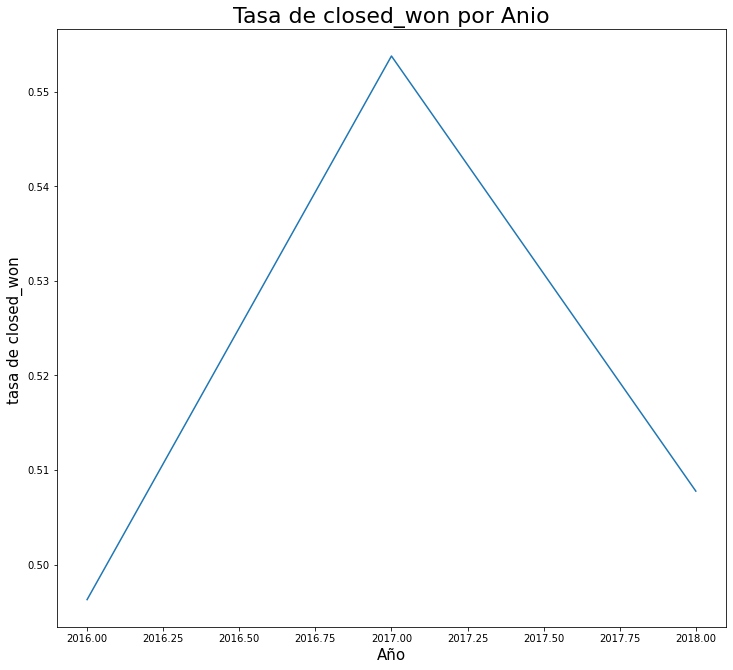

In [189]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=cant_anio_opportunity_stage, x="anio", y="tasa_won",ax=ax)
g.set_title("Tasa de closed_won por Anio", fontsize=22)
g.set_xlabel("Año",fontsize=15)
g.set_ylabel("tasa de closed_won ", fontsize=15)

**Vemos que la cantidad de items tuvo su pico mas alto de closed won en  2017, pero a partir de ese Año bajo bruscamente la cantidad de items, esto podria ser un mal manejo de la empresa y posible cierre.**

#tasa de stage won segun tipo de cuenta

In [ ]:
#vemos que cada oportunidad tiene una cuenta type, entonces saco repetidos
entrenamiento[['Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['Opportunity_Name','Account_Type','Stage','Opportunity_Owner'])\
.agg(cantidad=('Stage','count')).sample(2)

,,,,cantidad
Opportunity_Name,Account_Type,Stage,Opportunity_Owner,
Opportunity_Name_8188,Account_Type_0,Closed Won,Person_Name_64,3
Opportunity_Name_12357,Account_Type_0,Closed Won,Person_Name_18,1


In [ ]:
stage_opportunity_typeaccount=entrenamiento[['Opportunity_Owner','TRF','Stage','Opportunity_Name','Account_Type']]\
.groupby(['Opportunity_Name','Account_Type','Stage','Opportunity_Owner'])\
.agg(cantidad=('Stage','count')).reset_index()[[ 'Stage','Opportunity_Name','Account_Type']]

In [ ]:
#tasa de closed won / closed lost + closed won
count_stage_opportunity_typeaccount=stage_opportunity_typeaccount\
.groupby(['Account_Type','Stage']).agg(cantidad=('Stage','count')).unstack()

In [ ]:
count_stage_opportunity_typeaccount.columns=count_stage_opportunity_typeaccount.columns.droplevel()


Stage,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Account_Type,,,,,
Account_Type_0,1086.0,2332.0,NaN,2.0,NaN
Account_Type_1,107.0,17.0,NaN,1.0,NaN
Account_Type_2,2394.0,2282.0,10.0,18.0,7.0
Account_Type_4,5.0,3.0,NaN,NaN,NaN
Account_Type_5,1013.0,432.0,1.0,9.0,2.0
Account_Type_6,16.0,1.0,NaN,NaN,NaN
None,98.0,5.0,NaN,NaN,NaN


In [ ]:
tasa_acountType_stage=count_stage_opportunity_typeaccount['Closed Won']/( count_stage_opportunity_typeaccount['Closed Lost'] + count_stage_opportunity_typeaccount['Closed Won'] )

In [ ]:
tasa_acountType_stage=tasa_acountType_stage.to_frame().reset_index()
 

In [ ]:
tasa_acountType_stage.columns=['Account_Type', 'tasa_won_over_lost']

In [ ]:
top_tasa_acountType_stage=tasa_acountType_stage.nlargest(10,'tasa_won_over_lost')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'tipo de  Cuentas')

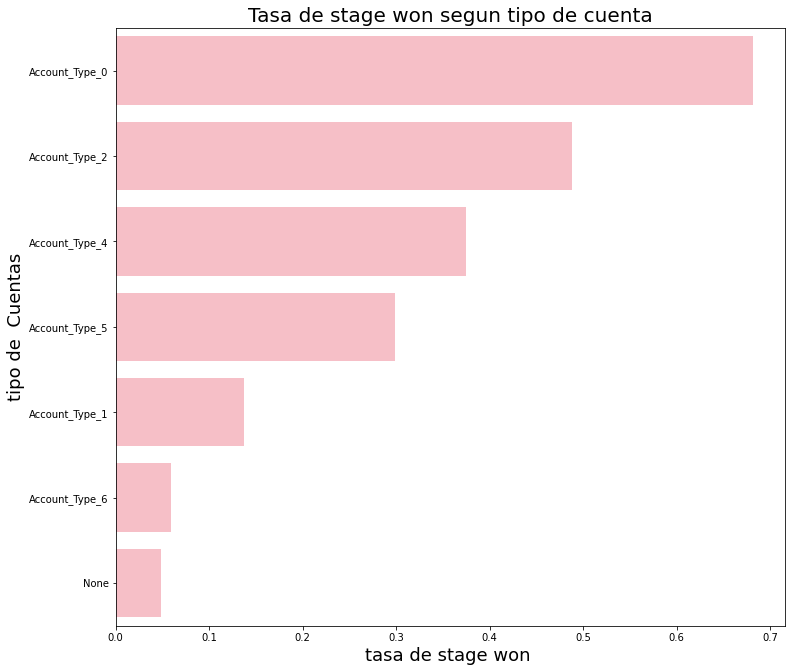

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.barplot("tasa_won_over_lost", "Account_Type", data=top_tasa_acountType_stage,palette=["lightpink"],ax=ax);
g.set_title("Tasa de stage won segun tipo de cuenta", fontsize=20)
g.set_xlabel("tasa de stage won ", fontsize=18)
g.set_ylabel("tipo de  Cuentas", fontsize=18)

##Hay preferencias por la eleccion de algun tipo de cuenta con su relacion de cantidad de oportunidades?

In [ ]:
#vemos que cada oportunidad tiene una cuenta type, entonces saco repetidos
entrenamiento[['TRF','Stage','Opportunity_Name','Account_Type']].groupby(['Opportunity_Name','Account_Type'])\
.agg(cantidad=('Stage','count')).head(2)


,,cantidad
Opportunity_Name,Account_Type,
Opportunity_Name_0,Account_Type_0,7
Opportunity_Name_1,Account_Type_2,7


In [ ]:
opportinty_name_account_type=entrenamiento[['TRF','Stage','Opportunity_Name','Account_Type']].groupby(['Opportunity_Name','Account_Type'])\
.agg(cantidad=('Stage','count'))
opportinty_name_account_type= opportinty_name_account_type.reset_index().drop('cantidad', 1)


In [ ]:
#ahora vamos a ver la cantidad de oportunidades que hay por typo de cuenta
top10_opportinty_name_account_type=opportinty_name_account_type.groupby('Account_Type')\
.agg(cantidad_oportunidades=('Opportunity_Name','count')).nlargest(10,'cantidad_oportunidades')
top10_opportinty_name_account_type=top10_opportinty_name_account_type.reset_index()

Text(0, 0.5, 'Cantidad de Cuentas')

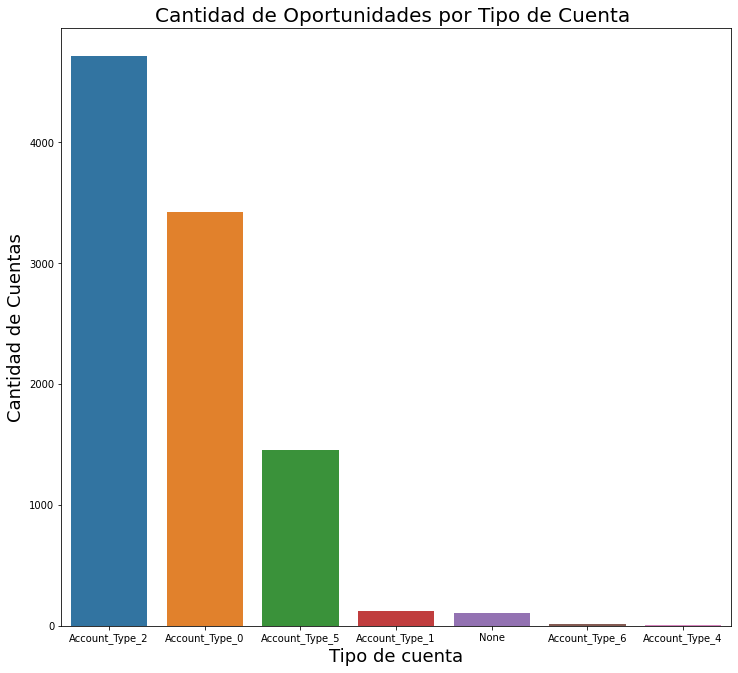

In [ ]:
df=top10_opportinty_name_account_type
 
#top10_opportinty_name_account_type
fig, ax = plt.subplots(figsize=(12,11))
 
g = sns.barplot(x=df['Account_Type'], y=df['cantidad_oportunidades'],data=df,ax=ax)
g.set_title("Cantidad de Oportunidades por Tipo de Cuenta ", fontsize=20)
g.set_xlabel("Tipo de cuenta", fontsize=18)
g.set_ylabel("Cantidad de Oportunidades", fontsize=18)

**Vemos que los tipos de cuenta mas usadas son del tipo 0,2, y 5 esto debe ser posiblemente por y ademas vemos proporcionalmente la cuenta de tipo 0 posee mayor closed Won comparado con el closed lost esto debe ser**

In [ ]:
# de aca para abajo no leer.

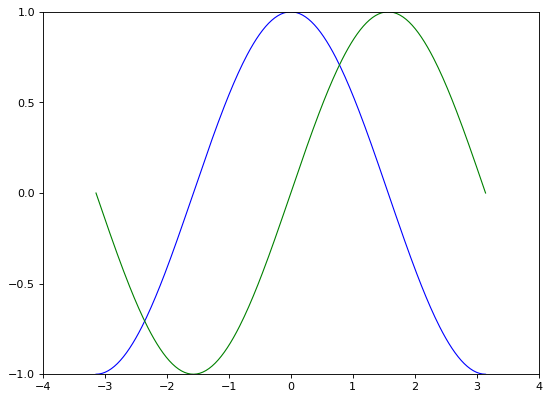

In [ ]:
import pylab as pl
import numpy as np

# Crear una figura de 8x6 puntos de tamaño, 80 puntos por pulgada
pl.figure(figsize=(8, 6), dpi=80)

# Crear una nueva subgráfica en una rejilla de 1x1
pl.subplot(1, 1, 1)

#aca creamos la linEA, eje x
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
#aca modelamos que forma tendra la linea por eso se les pasa el x.
C, S = np.cos(X), np.sin(X)
  #es el ejex y c el eje y
# Graficar la función coseno con una línea continua azul de 1 pixel de grosor
pl.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Graficar la función coseno con una línea continua verde de 1 pixel de grosor
pl.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Establecer límites del eje x
pl.xlim(-4.0, 4.0)

# Ticks en x
pl.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Establecer límites del eje y
pl.ylim(-1.0, 1.0)

# Ticks en y
pl.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Guardar la figura usando 72 puntos por pulgada
# savefig("exercice_2.png", dpi=72)

# Mostrar resultado en pantalla
pl.show()

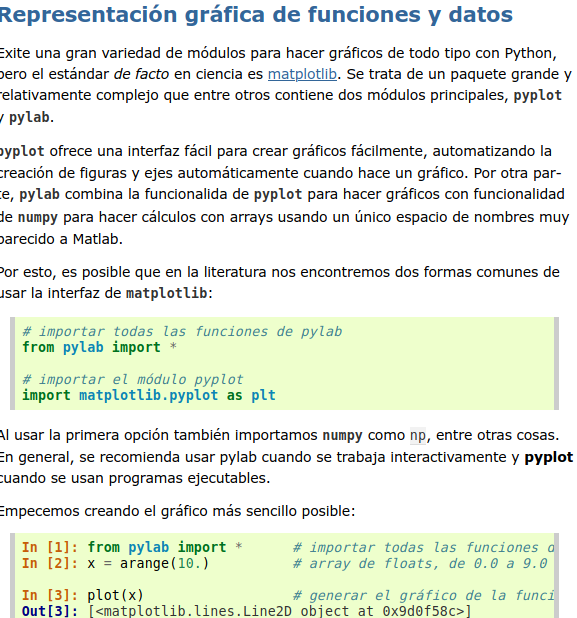

In [ ]:
#¿Por qué Total_Taxable_Amount es a veces mayor que Total_Amount?
no es mayor

In [ ]:
amount=entrenamiento
amount['total_amount_taxable_aux']=entrenamiento.groupby('Opportunity_Name')['Total_Amount'].transform('sum')
a=amount[(amount['total_amount_taxable_aux']-amount['Total_Taxable_Amount'])>0]#.head(10)#[['total_amount_taxable_aux','Total_Taxable_Amount']]
#.agg(cant_total_amount=('Total_Amount','sum')).reset_index()
#amount['delta_amount_with_amoun_taxable']=amount['cant_total_amount'] - amount['total_taxable']
#amount[amount['delta_amount_with_amoun_taxable'] >0]
a

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,total_amount_taxable_aux
132,5581,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,12/18/2015,None,United States,Account_Name_217,Opportunity_Name_2683,47,None,Person_Name_3,Person_Name_3,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/18/2015,None,None,None,None,None,None,NaT,1/22/2016,9/29/2016,Person_Name_3,Product_Family_158,Product_Name_284,USD,0.6600,USD,0.6600,5/16/2016,5/20/2016,2016 - 5,Q2,2016,NaT,1,USD,629145.00,USD,0.0,Closed Lost,Prod_Category_A_None,629145.00
186,8142,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,12/24/2015,None,United States,Account_Name_1734,Opportunity_Name_11275,96,None,Person_Name_3,Person_Name_3,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/24/2015,None,None,None,None,None,None,NaT,1/22/2016,9/29/2016,Person_Name_3,Product_Family_158,Product_Name_284,USD,0.6600,USD,0.6600,4/18/2016,4/22/2016,2016 - 4,Q2,2016,NaT,1,USD,659835.00,USD,0.0,Closed Lost,Prod_Category_A_None,1332347.50
187,8148,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,12/24/2015,None,United States,Account_Name_1734,Opportunity_Name_11275,96,None,Person_Name_3,Person_Name_3,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/24/2015,None,None,None,None,None,None,NaT,1/22/2016,9/29/2016,Person_Name_3,Product_Family_110,Product_Name_154,USD,0.6700,USD,0.6700,4/18/2016,4/22/2016,2016 - 4,Q2,2016,NaT,1,USD,672512.50,USD,0.0,Closed Lost,Prod_Category_A_None,1332347.50
217,27666,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,5/28/2015,None,United States,Account_Name_1226,Opportunity_Name_7405,118,None,Person_Name_3,Person_Name_3,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,3/31/2016,12/4/2016,Person_Name_47,Product_Family_164,Product_Name_308,USD,0.6450,USD,0.6450,7/11/2016,7/15/2016,2016 - 7,Q3,2016,NaT,5,USD,3225403.13,USD,0.0,Closed Lost,Prod_Category_A_None,9676209.39
218,27667,Americas,NE America,1,1,1,1,0,Bureaucratic_Code_4,5/28/2015,None,United States,Account_Name_1226,Opportunity_Name_7405,118,None,Person_Name_3,Person_Name_3,Account_Type_2,Opportunity_Type_19,Non Binding,Delivery_Terms_4,1/6/2016,None,None,None,None,None,None,NaT,3/31/2016,12/4/2016,Person_Name_47,Product_Family_164,Product_Name_308,USD,0.6450,USD,0.6450,6/13/2016,6/17/2016,2016 - 6,Q2,2016,NaT,5,USD,3225403.13,USD,0.0,Closed Lost,Prod_Category_A_None,9676209.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16858,10309,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2/1/2016,Source_13,Indonesia,Account_Name_1007,Opportunity_Name_7576,12767,None,Person_Name_63,Person_Name_11,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,11/30/2015,None,None,None,None,None,None,NaT,NaT,12/12/2016,Person_Name_11,Product_Family_77,Product_Name_99,USD,0.5500,USD,0.5500,4/20/2017,4/20/2017,2017 - 4,Q2,2017,NaT,9,USD,4954950.00,USD,4055000.0,Closed Lost,Prod_Category_A_None,9009950.00
16859,10315,APAC,Indonesia,1,0,1,0,0,Bureaucratic_Code_5,2/

In [ ]:
#por cada oportuniti name, tengo un solo tipo de stage
entrenamiento[['TRF','Stage','Opportunity_Name']].groupby(['Opportunity_Name','Stage']).agg(cantidad=('Stage','count'))

,,cantidad
Opportunity_Name,Stage,
Opportunity_Name_0,Closed Lost,7
Opportunity_Name_1,Closed Lost,7
Opportunity_Name_100,Closed Won,1
Opportunity_Name_1000,Closed Lost,1
Opportunity_Name_10000,Closed Lost,1
...,...,...
Opportunity_Name_9992,Closed Lost,1
Opportunity_Name_9995,Closed Lost,2
Opportunity_Name_9996,Closed Lost,1


In [ ]:
#aca vemos que por cada oportunidad tenemos muchas trf distintos, ojo no hablamos de la cantida
#sino de que en un oportunity name tenemos ejemplo en opoortunity_name_1 y dentro de el trf con un valor 0 y otro
# en 1, la columna cantidad es irrelevante,solo se mira los repetidos que tiene.
entrenamiento[['TRF','Stage','Opportunity_Name']].groupby(['Opportunity_Name','TRF'])\
.agg(cantidad=('Stage','count')).head(3)

cantidad
Opportunity_Name   TRF          
Opportunity_Name_0 1           7
Opportunity_Name_1 0           3
                   1           4

In [ ]:
#truco si lo agrupamos hasta el valor trf, entonces ya no tenemos repetidos
df_opportunity_trf=entrenamiento[['TRF','Stage','Opportunity_Name']]\
.groupby(['Opportunity_Name','Stage','TRF']).agg(cantidad=('Stage','count'))\
.reset_index()[['Opportunity_Name','Stage','TRF']]

In [ ]:
#ahoro si puedo sumar los trf
df_opportunity_trf.head(3)

,Opportunity_Name,Stage,TRF
0,Opportunity_Name_0,Closed Lost,1
1,Opportunity_Name_1,Closed Lost,0
2,Opportunity_Name_1,Closed Lost,1


In [ ]:
oppornity_total_trf=df_opportunity_trf.groupby('Opportunity_Name')\
.agg(total_trf_with_opportunity=('TRF','sum')).reset_index()
oppornity_total_trf.head(3)

,Opportunity_Name,total_trf_with_opportunity
0,Opportunity_Name_0,1
1,Opportunity_Name_1,1
2,Opportunity_Name_100,2


In [ ]:
#agrupo por oportuniy y stage, ya qu con este truco, me va a dar todo distinto, sin repetir.
opportunity_stage=entrenamiento[['Opportunity_Name','Stage']]\
.groupby( ['Opportunity_Name','Stage' ]).agg(canti=('Stage','count')).reset_index()[['Opportunity_Name','Stage']]
opportunity_stage=opportunity_stage.loc[\
                                        (opportunity_stage['Stage']=='Closed Lost') |  (opportunity_stage['Stage']=='Closed Won'),:]
opportunity_stage.head(2)                                        

,Opportunity_Name,Stage
0,Opportunity_Name_0,Closed Lost
1,Opportunity_Name_1,Closed Lost


In [ ]:
opportunity_trf_stage=pd.merge(opportunity_stage, oppornity_total_trf, on='Opportunity_Name', how='inner')
opportunity_trf_stage.head(2)

,Opportunity_Name,Stage,total_trf_with_opportunity
0,Opportunity_Name_0,Closed Lost,1
1,Opportunity_Name_1,Closed Lost,1


In [ ]:
opportunity_trf_stage_lost=opportunity_trf_stage.loc[opportunity_trf_stage['Stage']=='Closed Lost',:].nlargest(10,'total_trf_with_opportunity')

In [ ]:
opportunity_trf_stage_won=opportunity_trf_stage.loc[opportunity_trf_stage['Stage']=='Closed Won',:].nlargest(10,'total_trf_with_opportunity')

In [ ]:
#voy a ponerlo nombre corto
df=opportunity_trf_stage_won
df2=opportunity_trf_stage_lost

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

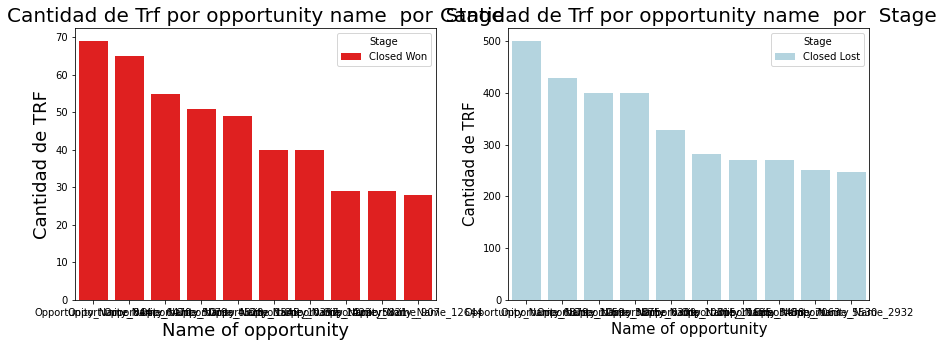

In [ ]:
fig, ax = plt.subplots(figsize=(22,11))


#fig = plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.025, top = 0.975, right=0.975)
ax1=plt.subplot(2, 3, 4)

 
#g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],palette=["red", "lightpink"],hue="Stage",data=df,ax=ax1)
g.set_title("Cantidad de Trf por opportunity name  por  Stage", fontsize=20)
g.set_xlabel("Name of opportunity", fontsize=18)
g.set_ylabel("Cantidad de TRF", fontsize=18)

#ax1=plt.xticks(())
#ax1=plt.yticks(()) 


ax2=plt.subplot(2, 3, 5)
g = sns.barplot(x=df2['Opportunity_Name'], y=df2['total_trf_with_opportunity'],palette=["lightblue", "lightpink"],hue="Stage",data=df2,ax=ax2)
g.set_title("Cantidad de Trf por opportunity name  por  Stage", fontsize=20)
g.set_xlabel("Name of opportunity", fontsize=15)
g.set_ylabel("Cantidad de TRF", fontsize=15)
#ax1=plt.xticks(())
#ax1=plt.yticks(())

 

plt.show()

In [ ]:
df=opportunity_trf_stage.nlargest(50,'closed_won')

KeyError: ignored

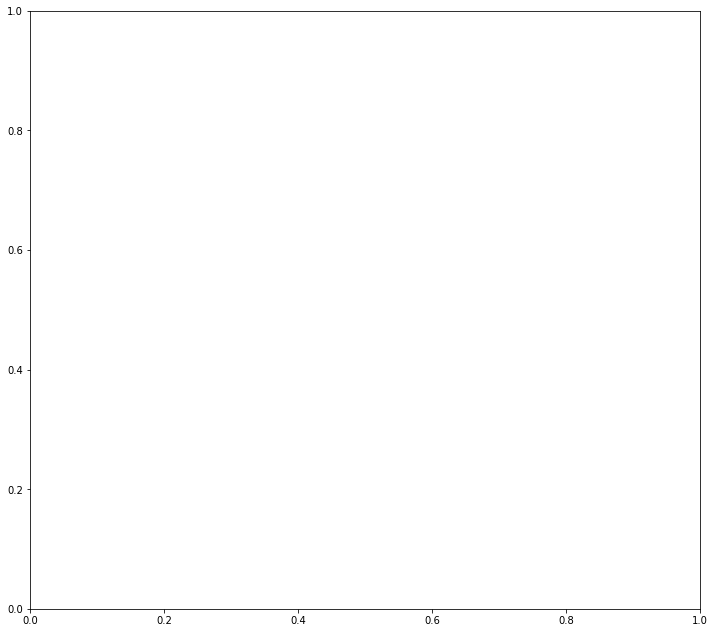

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
 
g = sns.barplot(x=df['Opportunity_Name'], y=df['total_trf_with_opportunity'],hue="Stage",data=df,ax=ax)
g.set_title("Cantidad de Cuentas por Tipo de Cuenta por  Stage", fontsize=20)
g.set_xlabel("Tipo de Stage", fontsize=18)
g.set_ylabel("Cantidad de Cuentas", fontsize=18)

In [ ]:
df_owners_mean_wins = entrenamiento.groupby("Opportunity_Owner")\
.filter(lambda x: (x["Stage"].count() > 50 ))



In [ ]:
df_owners_mean_wins

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None
5,16802,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_939,5,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018 - 2,Q1,2018,NaT,28,USD,14838277.50,USD,14838277.5,Closed Lost,Prod_Category_A_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Sou

In [ ]:
df_owners_mean_wins["Stage"] = df_owners_mean_wins["Stage"].apply(lambda x: 1 if (x == "Closed Won") else 0)

df_owners_mean_wins

In [ ]:
entrenamiento.groupby["Opportunity_Owner"]

In [ ]:
#acount y trf
accountName_sum_trf=entrenamiento.groupby(['Account_Name','TRF']).agg(sum_trf=('TRF','sum')).reset_index().nlargest(10,'sum_trf')
accountName_sum_trf

,Account_Name,TRF,sum_trf
2723,Account_Name_623,500,500
3213,Account_Name_899,429,429
2580,Account_Name_554,67,402
2135,Account_Name_285,400,400
2382,Account_Name_433,400,400
1218,Account_Name_1665,175,350
2012,Account_Name_25,1,337
3004,Account_Name_763,150,300
14,Account_Name_1006,270,270
682,Account_Name_1376,125,250


In [ ]:
#acount y trf
account_sum_trf=entrenamiento.groupby(['Account_Name']).agg(sum_trf=('TRF','sum')).reset_index()


In [ ]:
account_cant_won=entrenamiento.loc[entrenamiento['Stage']=='Closed Won'].groupby(['Account_Name']).agg(cant_stage_won=('ID','count'))

In [ ]:
relacion_account_sum_trf_with_cant_won=pd.merge(account_sum_trf, account_cant_won,on='Account_Name', how='inner')

In [ ]:
relacion_account_sum_trf_with_cant_won

,Account_Name,sum_trf,cant_stage_won
0,Account_Name_0,0,1
1,Account_Name_100,0,1
2,Account_Name_1001,0,1
3,Account_Name_1002,2,1
4,Account_Name_1006,509,2
...,...,...,...
662,Account_Name_991,50,15
663,Account_Name_993,0,12
664,Account_Name_994,13,4
665,Account_Name_998,0,1


In [ ]:
#acount y trf
account_sum_trf=entrenamiento.groupby(['Account_Name']).agg(sum_trf=('TRF','sum')).reset_index()
account_cant_losed=entrenamiento.loc[entrenamiento['Stage']=='Closed Lost'].groupby(['Account_Name']).agg(cant_stage_losed=('ID','count'))
relacion_account_sum_trf_with_cant_losed=pd.merge(account_sum_trf, account_cant_losed,on='Account_Name', how='inner')
relacion_account_sum_trf_with_cant_losed

,Account_Name,sum_trf,cant_stage_losed
0,Account_Name_1,50,1
1,Account_Name_10,0,1
2,Account_Name_1000,0,1
3,Account_Name_1004,0,1
4,Account_Name_1006,509,5
...,...,...,...
1394,Account_Name_990,0,2
1395,Account_Name_991,50,19
1396,Account_Name_994,13,7
1397,Account_Name_996,12,1


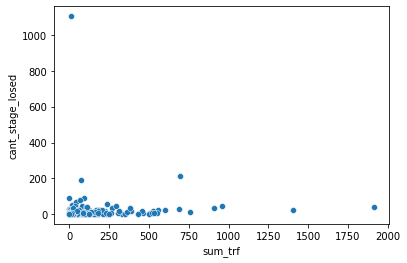

In [ ]:
sns.scatterplot(data=relacion_account_sum_trf_with_cant_losed, x="sum_trf", y="cant_stage_losed")

(0.0, 50.0)

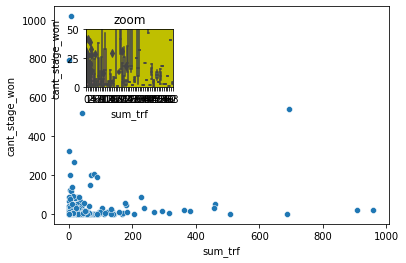

In [ ]:
fig, ax = plt.subplots()

sns.scatterplot(data=relacion_account_sum_trf_with_cant_won, x="sum_trf", y="cant_stage_won", ax=ax)
ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.boxplot(data=relacion_account_sum_trf_with_cant_won,x="sum_trf", y="cant_stage_won",ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0,50])
ax2.set_ylim([0,50])

In [ ]:
relacion_account_sum_trf_with_cant_won['tipo']='stage_won'

(0.9, 1.0)

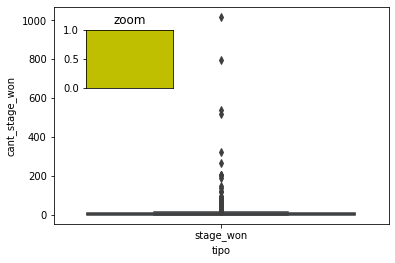

In [ ]:
fig, ax = plt.subplots()

ax = sns.boxplot(x="tipo", y="cant_stage_won" , data=relacion_account_sum_trf_with_cant_won,ax=ax)
ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.boxplot( ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0.9,1.])

In [ ]:
fig, ax = plt.subplots()
sns.boxplot(d, ax=ax)

ax2 = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
sns.boxplot, ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0.9,1.])

In [ ]:
entrenamiento.groupby(['Account_Name','Stage'])['Stage'].agg()

In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')].agg({'Stage':lambda x: x.sum()})


Stage    Closed LostClosed WonClosed WonClosed LostClos...
dtype: object

In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage'])['Stage'].transform(lambda x: 1 if x=='Closed Lost' else 0)

ValueError: ignored

In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage']).agg(cant_stage_won=('ID','count'),cant_stage_loss=('ID','count')).head(50)

,,cant_stage_won,cant_stage_loss
Account_Name,Stage,,
Account_Name_0,Closed Won,1,1
Account_Name_1,Closed Lost,1,1
Account_Name_10,Closed Lost,1,1
Account_Name_100,Closed Won,1,1
Account_Name_1000,Closed Lost,1,1
Account_Name_1001,Closed Won,1,1
Account_Name_1002,Closed Won,1,1
Account_Name_1004,Closed Lost,1,1
Account_Name_1006,Closed Lost,5,5


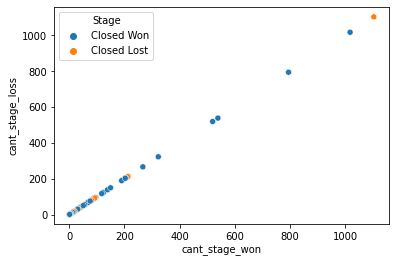

In [ ]:
df=entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage']).agg(cant_stage_won=('ID','count'),cant_stage_loss=('ID','count')).reset_index()
sns.scatterplot(data=df, x="cant_stage_won", y="cant_stage_loss", hue="Stage")

In [ ]:
entrenamiento.loc[(entrenamiento['Stage']=='Closed Lost' )| (entrenamiento['Stage']=='Closed Won')]\
.groupby(['Account_Name','Stage']).agg(cant_stage_won=('ID','count'),cant_stage_loss=('ID','count')).reset_index()

,Account_Name,Stage,cant_stage_won,cant_stage_loss
0,Account_Name_0,Closed Won,1,1
1,Account_Name_1,Closed Lost,1,1
2,Account_Name_10,Closed Lost,1,1
3,Account_Name_100,Closed Won,1,1
4,Account_Name_1000,Closed Lost,1,1
...,...,...,...,...
2061,Account_Name_994,Closed Won,4,4
2062,Account_Name_996,Closed Lost,1,1
2063,Account_Name_997,Closed Lost,1,1
2064,Account_Name_998,Closed Won,1,1


In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP_Currency']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP_Currency']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

In [ ]:
#un producto tiene distintos 

In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP_Currency']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

Product_Name_85     4
Product_Name_128    4
Product_Name_148    4
Product_Name_168    4
Product_Name_107    4
                   ..
Product_Name_509    1
Product_Name_70     1
Product_Name_172    1
Product_Name_151    1
Product_Name_454    1
Name: Product_Name, Length: 456, dtype: int64

In [ ]:
prod.loc[prod['Product_Name']=='Product_Name_85',['Product_Name','ASP_Currency']]

,Product_Name,ASP_Currency
731,Product_Name_85,AUD
732,Product_Name_85,EUR
733,Product_Name_85,JPY
734,Product_Name_85,USD


In [ ]:
# product name no se relaciona con ASP, parece que crece a medida que pasa el tiempo

(Average Selling Price) precio promedio a la venta (Decimal).

In [ ]:
prod=entrenamiento.groupby(['Product_Name','ASP']).agg(cant=('ID','count')).reset_index()
prod['Product_Name'].value_counts()

Product_Name_100    92
Product_Name_111    76
Product_Name_167    76
Product_Name_226    66
Product_Name_231    63
                    ..
Product_Name_486     1
Product_Name_309     1
Product_Name_385     1
Product_Name_24      1
Product_Name_454     1
Name: Product_Name, Length: 438, dtype: int64

In [ ]:
prod.loc[prod['Product_Name']=='Product_Name_85',['Product_Name','ASP']]

,Product_Name,ASP
4069,Product_Name_85,0.000
4070,Product_Name_85,0.150
4071,Product_Name_85,0.285
4072,Product_Name_85,0.330
4073,Product_Name_85,0.340
4074,Product_Name_85,0.350
4075,Product_Name_85,0.360
4076,Product_Name_85,0.365
4077,Product_Name_85,0.370
4078,Product_Name_85,0.375


In [ ]:
prod.drop_duplicates('VC_CODASI', keep="last", inplace=True)

In [ ]:
prod=entrenamiento.groupby(['Account_Name','ASP']).agg(cant=('ID','count')).reset_index()
prod.nlargest(10,'cant')

,Account_Name,ASP,cant
3210,Account_Name_25,0.3875,162
1215,Account_Name_1440,0.5400,126
2418,Account_Name_1836,65.0000,109
2536,Account_Name_1888,68.0000,107
2530,Account_Name_1888,53.0000,99
2784,Account_Name_1991,0.0000,98
5398,Account_Name_931,0.1700,91
2539,Account_Name_1888,75.0000,87
3216,Account_Name_25,0.4000,87
3236,Account_Name_25,0.4600,86


In [ ]:
entrenamiento.loc[entrenamiento['Account_Name']=='Account_Name_25',['Account_Name','ASP']]

,Account_Name,ASP
577,Account_Name_25,0.430
633,Account_Name_25,NaN
634,Account_Name_25,0.420
725,Account_Name_25,0.445
726,Account_Name_25,0.420
...,...,...
16802,Account_Name_25,0.630
16803,Account_Name_25,0.630
16804,Account_Name_25,0.630
16805,Account_Name_25,0.630


In [ ]:
entrenamiento.groupby([''])

In [ ]:
#tiempo de vida promedio de una cuenta


In [ ]:
entrenamiento['Account_Created_Date']= pd.to_datetime(entrenamiento['Account_Created_Date'])
entrenamiento['Year_Account_Created_Date']= entrenamiento['Account_Created_Date'].dt.year

entrenamiento['Month_Account_Created_Date']= entrenamiento['Account_Created_Date'].dt.month
entrenamiento['Day_Account_Created_Date']= entrenamiento['Account_Created_Date'].dt.day

In [ ]:
account_year_created=entrenamiento.groupby(['Account_Name','Year_Account_Created_Date']).agg(cant=('ID','count')).reset_index()#.nlargest(20,'cant')

In [ ]:
entrenamiento[['Account_Name','Planned_Delivery_Start_Date','Stage','Product_Name']].head(60)

,Account_Name,Planned_Delivery_Start_Date,Stage,Product_Name
0,Account_Name_619,5/1/2016,Closed Lost,Product_Name_99
1,Account_Name_619,1/18/2016,Closed Won,Product_Name_100
2,Account_Name_1794,1/25/2016,Closed Won,Product_Name_91
3,Account_Name_1201,2/1/2018,Closed Lost,Product_Name_432
4,Account_Name_1201,2/1/2018,Closed Lost,Product_Name_432
5,Account_Name_1201,2/1/2018,Closed Lost,Product_Name_432
6,Account_Name_1201,2/1/2017,Closed Lost,Product_Name_308
7,Account_Name_1794,1/25/2016,Closed Won,Product_Name_251
8,Account_Name_1888,2/29/2016,Closed Lost,Product_Name_6
9,Account_Name_1888,2/29/2016,Closed Lost,Product_Name_4


In [ ]:
df=entrenamiento
df['delta_tiempo']=entrenamiento.groupby('Account_Name')['Account_Created_Date'].transform(lambda x: x.min()-x.max())
df['Account_Name'].value_counts()

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
                     ... 
Account_Name_82         1
Account_Name_1156       1
Account_Name_1393       1
Account_Name_996        1
Account_Name_639        1
Name: Account_Name, Length: 1635, dtype: int64

In [ ]:
account_year_created['Account_Name'].value_counts()

Account_Name_390     2
Account_Name_2077    1
Account_Name_1880    1
Account_Name_1504    1
Account_Name_1407    1
                    ..
Account_Name_1547    1
Account_Name_1252    1
Account_Name_1317    1
Account_Name_1453    1
Account_Name_639     1
Name: Account_Name, Length: 1635, dtype: int64

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

In [ ]:
entrenamiento['Planned_Delivery_End_Date'].value_counts()

3/31/2016     451
6/30/2017     322
2/29/2016     300
9/28/2018     262
6/29/2018     249
             ... 
8/11/2016       1
10/14/2020      1
12/8/2018       1
7/8/2017        1
6/19/2019       1
Name: Planned_Delivery_End_Date, Length: 1017, dtype: int64

In [ ]:
entrenamiento['Planned_Delivery_End_Date'].value_counts()

In [ ]:
La cantidad de items de oportunidad varia por Año?

In [ ]:
#aca empese a nalizar cuenta por pais

In [ ]:
entrenamiento['Region','Account_Type'].agg(cantidad_type_account=('ID','count'))

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,anio,mes
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/30/2016,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,5/1/2016,6/30/2016,2016-05-01,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,2016,5
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/7/2015,None,None,None,None,None,None,NaT,1/20/2016,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,1/18/2016,1/20/2016,2016-01-01,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,2016,1
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,12/8/2015,None,None,None,None,None,None,NaT,9/30/2016,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,1/25/2016,1/25/2016,2016-01-01,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,2016,1
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,3/31/2018,2018-02-01,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,2018,2
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,12/8/2015,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,6/2/2017,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2/1/2018,2/28/2018,2018-02-01,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,1/15/2016,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,12/4/2015,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,3/21/2016,3/25/2016,2016-03-01,Q1,2016,NaT,0,EUR,103350.00,EUR,299715.0,Closed Won,Prod_Category_A_None,2016,3
16943,8786,EMEA,Austria,1,1,1,1,0,Bureaucratic_C

In [ ]:
entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count'))

cantidad_type_account
Account_Type   Territory                                  
Account_Type_0 Australia                               870
               Austria                                 139
               Belgium                                 133
               Bosnia & Herzegovina                      3
               Bulgaria                                  1
...                                                    ...
None           Singapore                                17
               Solomon Islands                           1
               Spain                                     1
               UAE (Dubai)                              15
               Vietnam                                   1

[198 rows x 1 columns]

In [ ]:
entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count')).nlargest(10,'cantidad_type_account')

cantidad_type_account
Account_Type   Territory                        
Account_Type_2 None                         4315
Account_Type_0 Germany                       928
               Australia                     870
               NW America                    845
Account_Type_2 NE America                    543
               India                         511
Account_Type_0 Japan                         464
Account_Type_2 NW America                    459
Account_Type_0 None                          454
Account_Type_2 Germany                       449

In [ ]:
df=entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count'))
df.nlargest(10,'cantidad_type_account')

In [ ]:
def asf(x):
  for pos,item in enumerate(x):
    if (pos<10 and item< x.mean()):
      return True
    else:
      return False 
  return False      
      

In [ ]:
def asf(x):
  if (x< x.mean()).all():
      return 'true'
  else:
      return 'false'


In [ ]:
at=entrenamiento.groupby(['Account_Type','Territory']).agg(cantidad_type_account=('ID','count'))\
.transform(lambda x: x>x.mean()).reset_index()


In [ ]:
at.loc[at['cantidad_type_account']==True ,:].groupby(['Account_Type','Territory'])

,Account_Type,Territory,cantidad_type_account
0,Account_Type_0,Australia,True
1,Account_Type_0,Austria,True
2,Account_Type_0,Belgium,True
9,Account_Type_0,China (PRC),True
14,Account_Type_0,France,True
15,Account_Type_0,Germany,True
18,Account_Type_0,India,True
21,Account_Type_0,Italy,True
22,Account_Type_0,Japan,True
31,Account_Type_0,NE America,True


-------------------------------------------------
####PRUEBAS, NO VEAN LOQUE SIGUE

In [ ]:
entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count'))['cantidad_muestra'].transform(lambda x: x> (x.mean()-1100))

Region       Territory   
APAC         Australia       True
             Burma           True
             Cambodia        True
             China (PRC)     True
             India           True
                             ... 
Middle East  Oman            True
             Pakistan        True
             Saudi Arabia    True
             UAE (Dubai)     True
             UAE (Others)    True
Name: cantidad_muestra, Length: 85, dtype: bool

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region'])['ID'].transform(lambda)

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count'))
lugares_cantidad_casos.groupby(['Region'])['cantidad_muestra'].transform('mean')

Region       Territory   
APAC         Australia       203.875
             Burma           203.875
             Cambodia        203.875
             China (PRC)     203.875
             India           203.875
                              ...   
Middle East  Oman             18.400
             Pakistan         18.400
             Saudi Arabia     18.400
             UAE (Dubai)      18.400
             UAE (Others)     18.400
Name: cantidad_muestra, Length: 85, dtype: float64

In [ ]:
entrenamiento.groupby(['Region'])['ID'].transform('sum')

0        70941823
1        70941823
2        68497466
3        68497466
4        68497466
           ...   
16942    70941823
16943    70941823
16944    70941823
16945    68497466
16946    68497466
Name: ID, Length: 16947, dtype: int64

In [ ]:
entrenamiento.groupby(['Region'])['ID'].transform('mean')

0        15210.510935
1        15210.510935
2        17363.109252
3        17363.109252
4        17363.109252
             ...     
16942    15210.510935
16943    15210.510935
16944    15210.510935
16945    17363.109252
16946    17363.109252
Name: ID, Length: 16947, dtype: float64

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count')).reset_index()
lugares_cantidad_casos.groupby(['Region','Territory']).transform(lambda x:x>x.mean())

,cantidad_muestra
0,False
1,False
2,False
3,False
4,False
...,...
80,False
81,False
82,False
83,False


In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region','Territory']).agg(cantidad_muestra=('ID','count')).reset_index()
lugares_cantidad_casos

,Region,Territory,cantidad_muestra
0,APAC,Australia,1208
1,APAC,Burma,1
2,APAC,Cambodia,4
3,APAC,China (PRC),218
4,APAC,India,809
...,...,...,...
80,Middle East,Oman,4
81,Middle East,Pakistan,6
82,Middle East,Saudi Arabia,6
83,Middle East,UAE (Dubai),19


In [ ]:
lugares_cantidad_casos=lugares_cantidad_casos

TypeError: ignored

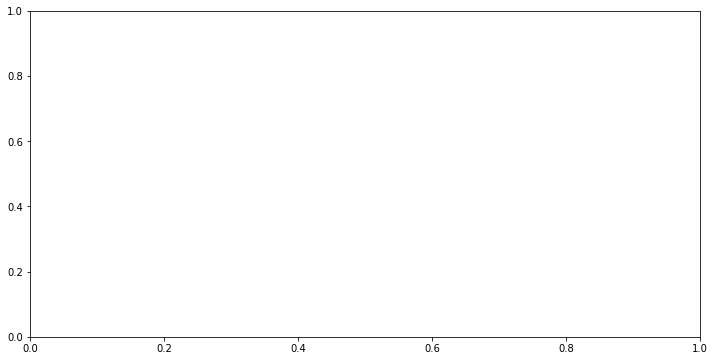

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[(25,50),(75,100),(125,56),(25,34),(15,98)],
              color=['red','blue','yellow','green','orange']*2,
              label=['A\n25','B\n50','C\n75','D\n100','E\n125']*2,
              pad )

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

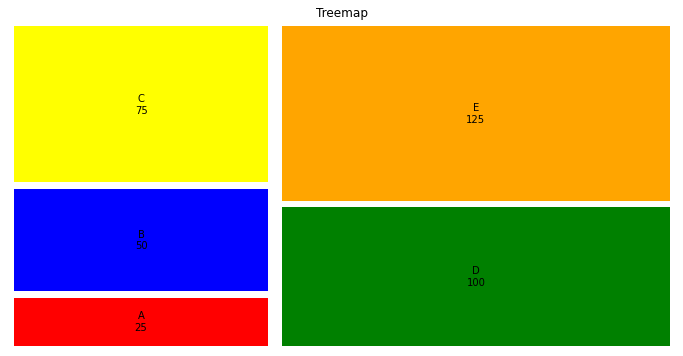

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
lugares_cantidad_casos=entrenamiento.groupby(['Region']).agg(cantidad_muestra=('ID','count')).reset_index()


In [ ]:
#Utilise matplotlib to scale our goal numbers between the min and max, then assign this scale to our values.
norm = matplotlib.colors.Normalize(vmin=min(lugares_cantidad_casos.cantidad_muestra), vmax=max(lugares_cantidad_casos.cantidad_muestra))
colors = [matplotlib.cm.Blues(norm(value)) for value in lugares_cantidad_casos.cantidad_muestra]

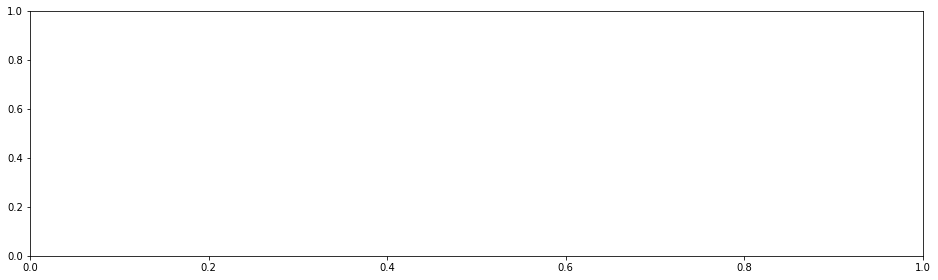

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=lugares_cantidad_casos.Region ,sizes=lugares_cantidad_casos.cantidad_muestra, color = colors, alpha=.6)
plt.title("Man City Goals",fontsize=23,fontweight="bold")

Text(0.5, 1.0, 'Man City Goals')

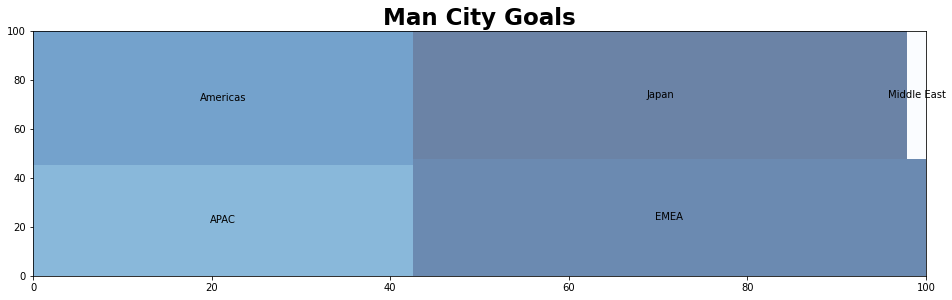

In [ ]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
#Use squarify to plot our data, label it and add colours. We add an alpha layer to ensure black labels show through
squarify.plot(label=lugares_cantidad_casos.Region ,sizes=lugares_cantidad_casos.cantidad_muestra, color = colors, alpha=.6)
plt.title("Man City Goals",fontsize=23,fontweight="bold")

In [ ]:
 
vendors = ["A", "B", "C", "D", None, "E", "F", "G", "H", None]
sectors = ["Tech", "Tech", "Finance", "Finance", "Other",
        "Tech", "Tech", "Finance", "Finance", "Other"]
regions = ["North", "North", "North", "North", "North",
        "South", "South", "South", "South", "South"]
sales = [1, 3, 2, 4, 1, 2, 2, 1, 4, 1]
df = pd.DataFrame(
    dict(vendors=vendors, sectors=sectors, regions=regions, sales=sales)
)
df["all"] = "all"  # in order to have a single root node

print(df)
fig = px.treemap(df, path=['all', 'regions',
                        'sectors', 'vendors'], values='sales')
fig.show()

  vendors  sectors regions  sales  all
0       A     Tech   North      1  all
1       B     Tech   North      3  all
2       C  Finance   North      2  all
3       D  Finance   North      4  all
4    None    Other   North      1  all
5       E     Tech   South      2  all
6       F     Tech   South      2  all
7       G  Finance   South      1  all
8       H  Finance   South      4  all
9    None    Other   South      1  all


TypeError: ignored

In [ ]:
import treemap.render_to_file('treemap.html')

SyntaxError: ignored

In [ ]:
!pip install squarify
!pip install pygal
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import pygal



     |████████████████████████████████| 133kB 1.4MB/s 


b'<?xml version=\'1.0\' encoding=\'utf-8\'?>\n<svg xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" id="chart-b5a57839-5a37-4afc-a0b2-0d96451e142d" class="pygal-chart" viewBox="0 0 800 600"><!--Generated with pygal 2.4.0 (lxml) \xc2\xa9Kozea 2012-2016 on 2020-10-30--><!--http://pygal.org--><!--http://github.com/Kozea/pygal--><defs><style type="text/css">#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d{-webkit-user-select:none;-webkit-font-smoothing:antialiased;font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d .title{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:16px}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d .legends .legend text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:14px}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142d .axis text{font-family:Consolas,"Liberation Mono",Menlo,Courier,monospace;font-size:10px}#chart-b5a57839-5a37-4afc-a0b2-0d96451e142

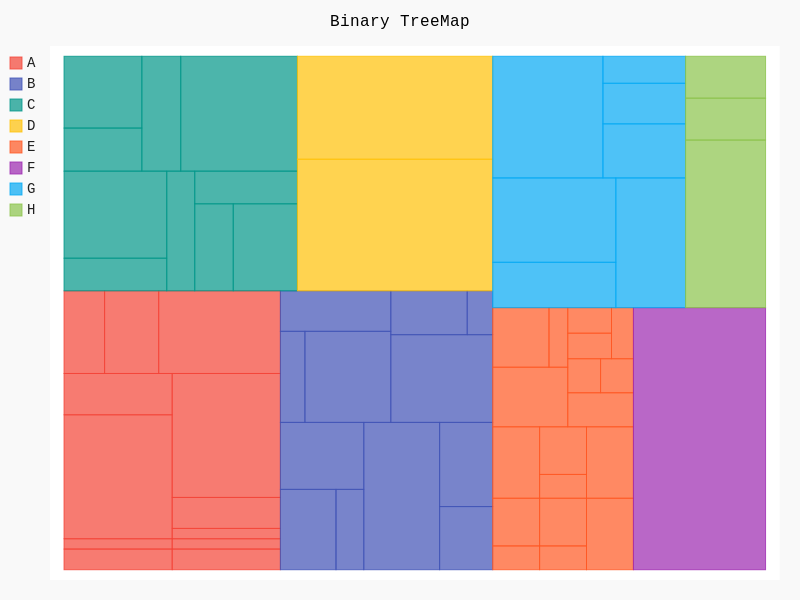

In [ ]:
#!pip install cairosvg
#import cairosvg
treemap = pygal.Treemap()
treemap.title = 'Binary TreeMap'
treemap.add('A', [2, 1, 12, 4, 2, 1, 1, 3, 12, 3, 4, None, 9])
treemap.add('B', [4, 2, 5, 10, 3, 4, 2, 7, 4, -10, None, 8, 3, 1])
treemap.add('C', [3, 8, 3, 3, 5, 3, 3, 5, 4, 12])
treemap.add('D', [23, 18])
treemap.add('E', [1, 2, 1, 2, 3, 3, 1, 2, 3,
      4, 3, 1, 2, 1, 1, 1, 1, 1])
treemap.add('F', [31])
treemap.add('G', [5, 9.3, 8.1, 12, 4, 3, 2])
treemap.add('H', [12, 3, 3])
treemap.add_squares()
treemap

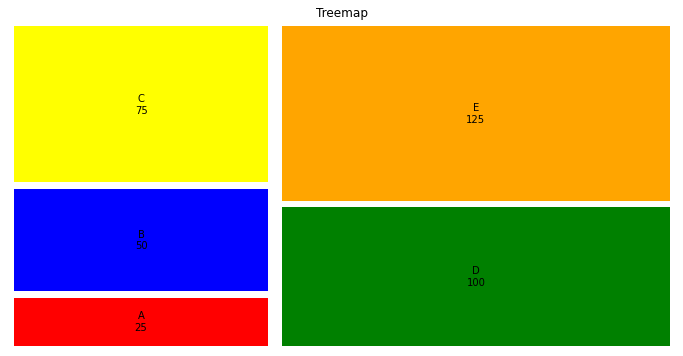

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
import squarify
import matplotlib.pyplot as plt
import numpy as np
from vega_datasets import data as vds
import pygal

In [ ]:
squarify.plot?

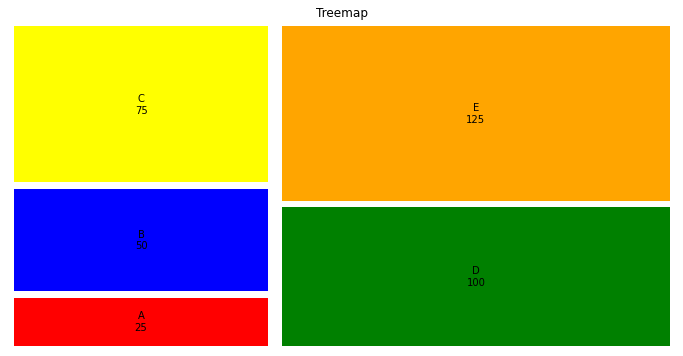

In [ ]:
plt.figure(figsize=(12,6))
squarify.plot(sizes=[25,50,75,100,125],
              color=['red','blue','yellow','green','orange'],
              label=['A\n25','B\n50','C\n75','D\n100','E\n125'],
              pad=True)

plt.title('Treemap')
plt.axis('off');
# ; gets rid of extra text
# some IDEs/text editors may require plt.show()

In [ ]:
import plotly.express as pxfig = px.treemap(df, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )fig.show()

In [ ]:
 import plotly.express as px
 fig = px.treemap(df, 
                 path=['Platform', 'Genre'], 
                 values='Global_Sales',
                 color='NA_Sales'
                )
 fig.show()

TypeError: ignored

In [ ]:
# If you have a data frame?

df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show() 

In [ ]:
import plotly.express as px
import pandas as pd
from collections import defaultdict

data = defaultdict()

data['level_1'] = ['A', 'A', 'A', 'B', 'B', 'B']
data['level_2'] = ['X', 'X', 'Y', 'Z', 'Z', 'X']
data['level_3'] = ['1', '2', '2', '1', '1', '2']

data =  pd.DataFrame.from_dict(data)
fig = px.treemap(data, path=['level_1', 'level_2', 'level_3'])
fig.show()


In [ ]:
entrenamiento.ASP.value_counts()

0.38000    801
0.40000    712
0.36000    564
0.42000    510
0.39000    465
          ... 
0.34730      1
0.27400      1
0.25300      1
0.45789      1
0.24400      1
Name: ASP, Length: 301, dtype: int64

In [ ]:
entrenamiento.Stage.value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

In [ ]:
entrenamiento.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
entrenamiento[['Total_Amount_Currency','Total_Taxable_Amount_Currency']]

,Total_Amount_Currency,Total_Taxable_Amount_Currency
0,EUR,EUR
1,EUR,EUR
2,USD,USD
3,USD,USD
4,USD,USD
...,...,...
16942,EUR,EUR
16943,EUR,EUR
16944,EUR,EUR
16945,USD,USD


In [ ]:
entrenamiento[['Stage','Month']]

,Stage,Month
0,Closed Lost,2016 - 5
1,Closed Won,2016 - 1
2,Closed Won,2016 - 1
3,Closed Lost,2018 - 2
4,Closed Lost,2018 - 2
...,...,...
16942,Closed Won,2016 - 3
16943,Closed Won,2016 - 4
16944,Closed Won,2016 - 3
16945,Closed Lost,2016 - 4


In [ ]:
data.plot(x='year', y='ct', ax=ax, label=key)

In [ ]:
df.groupby(['mes','Stage']).agg(cantidad_muestra=())

10    1676
3     1630
6     1563
7     1492
4     1484
5     1396
2     1388
1     1299
11    1291
9     1280
8     1271
12    1177
Name: mes, dtype: int64

TypeError: ignored

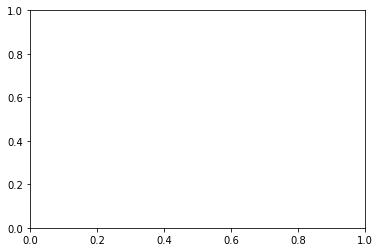

In [ ]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in entrenamiento.groupby('Stage'):
    data.plot(x='Stage', y='Month', ax=ax, label=key)

In [ ]:
entrenamiento['Total_Amount'].value_counts()

6200.0        513
4400.0        461
18000.0       353
140000.0      272
1600.0        204
             ... 
193600.0        1
4972.8          1
8001840.0       1
12333750.0      1
11960.0         1
Name: Total_Amount, Length: 8872, dtype: int64

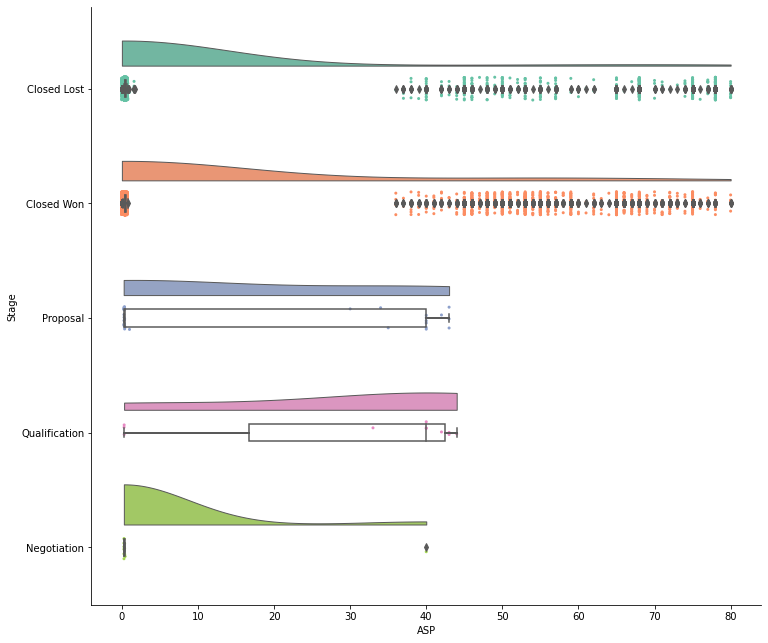

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.groupby(['Billing_Country'])['Billing_Country'].transform('count')

0         563
1         563
2        3802
3        3802
4        3802
         ... 
16942     145
16943     145
16944     145
16945    3802
16946    3802
Name: Billing_Country, Length: 16947, dtype: int64

In [ ]:
entrenamiento['Billing_Country'].value_counts()

Japan                     4879
United States             3802
Germany                   1979
Australia                 1169
India                      672
                          ... 
Dominican Republic           1
Ecuador                      1
Bosnia and Herzegovina       1
Libya                        1
Peru                         1
Name: Billing_Country, Length: 80, dtype: int64

In [ ]:
entrenamiento['Billing_Country'].describe()


count     16947
unique       80
top       Japan
freq       4879
Name: Billing_Country, dtype: object

In [ ]:
billing_country_stage=entrenamiento.groupby(['Billing_Country','Stage']).agg(cantidad=('Stage','count')).unstack(level='Stage')

In [ ]:
billing_country_stage.columns=['Closed Lost'   ,'Closed Won',  'Negotiation',     'Proposal','Qualification']

In [ ]:
billing_country_stage

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Billing_Country,,,,,
Albania,2.0,NaN,NaN,NaN,NaN
Argentina,1.0,NaN,NaN,NaN,NaN
Armenia,2.0,NaN,NaN,NaN,NaN
Australia,470.0,695.0,NaN,4.0,NaN
Austria,23.0,122.0,NaN,NaN,NaN
...,...,...,...,...,...
Turkey,10.0,7.0,NaN,NaN,NaN
United Arab Emirates,33.0,5.0,1.0,2.0,NaN
United Kingdom,157.0,127.0,NaN,NaN,NaN


Text(32.99999999999999, 0.5, 'Año de Lanzamiento del Proyecto')

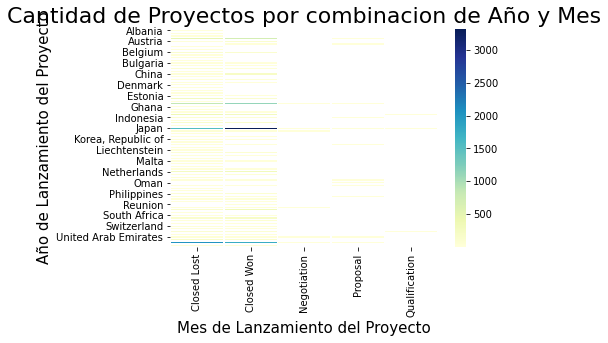

In [ ]:


g = sns.heatmap(billing_country_stage, linewidths=.5, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)



In [ ]:
billing_country_stage.nlargest(10,'Closed Lost')

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Billing_Country,,,,,
United States,2035.0,1755.0,8.0,4.0,NaN
Japan,1533.0,3323.0,1.0,14.0,8.0
Germany,855.0,1122.0,1.0,1.0,NaN
Australia,470.0,695.0,NaN,4.0,NaN
India,387.0,284.0,NaN,NaN,1.0
France,285.0,111.0,NaN,NaN,NaN
Netherlands,248.0,315.0,NaN,NaN,NaN
United Kingdom,157.0,127.0,NaN,NaN,NaN
Italy,143.0,152.0,NaN,NaN,NaN


Text(87.0, 0.5, 'Año de Lanzamiento del Proyecto')

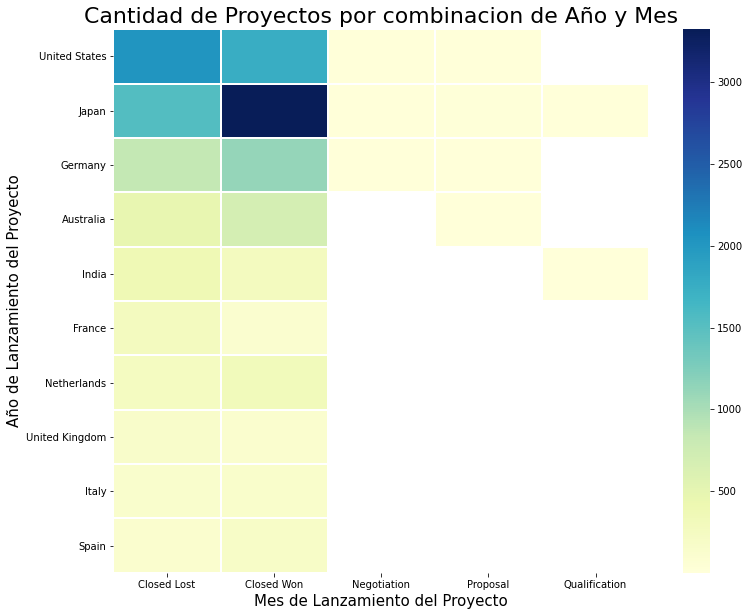

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(billing_country_stage.nlargest(10,'Closed Lost'), ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)


In [ ]:
billing_country_stage.nlargest(10,'Closed Won')

,Closed Lost,Closed Won,Negotiation,Proposal,Qualification
Billing_Country,,,,,
Japan,1533.0,3323.0,1.0,14.0,8.0
United States,2035.0,1755.0,8.0,4.0,NaN
Germany,855.0,1122.0,1.0,1.0,NaN
Australia,470.0,695.0,NaN,4.0,NaN
Singapore,114.0,318.0,NaN,NaN,NaN
Netherlands,248.0,315.0,NaN,NaN,NaN
India,387.0,284.0,NaN,NaN,1.0
China,19.0,203.0,NaN,NaN,NaN
Spain,125.0,192.0,NaN,NaN,NaN


In [ ]:
entrenamiento.groupby(['Month','entrenamiento']).agg(stage_by_month=('Delivery_Year','count'))

KeyError: ignored

Acountype y su relacion

In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
entrenamiento['Account_Type'].value_counts()

Account_Type_2    8832
Account_Type_0    5868
Account_Type_5    1943
Account_Type_1     165
None               112
Account_Type_6      17
Account_Type_4      10
Name: Account_Type, dtype: int64

In [ ]:
account_stage=entrenamiento.groupby(['Account_Type','Stage']).agg(cantidad=('Stage','count')).unstack(level='Stage').fillna(0)
account_stage.columns=['Closed Lost','Closed Won','Negotiation','Proposal',' 	Qualification']
account_stage

,Closed Lost,Closed Won,Negotiation,Proposal,\tQualification
Account_Type,,,,,
Account_Type_0,1718.0,4148.0,0.0,2.0,0.0
Account_Type_1,133.0,31.0,0.0,1.0,0.0
Account_Type_2,4021.0,4765.0,17.0,21.0,8.0
Account_Type_4,6.0,4.0,0.0,0.0,0.0
Account_Type_5,1351.0,577.0,1.0,11.0,3.0
Account_Type_6,16.0,1.0,0.0,0.0,0.0
None,105.0,7.0,0.0,0.0,0.0


In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


AttributeError: ignored

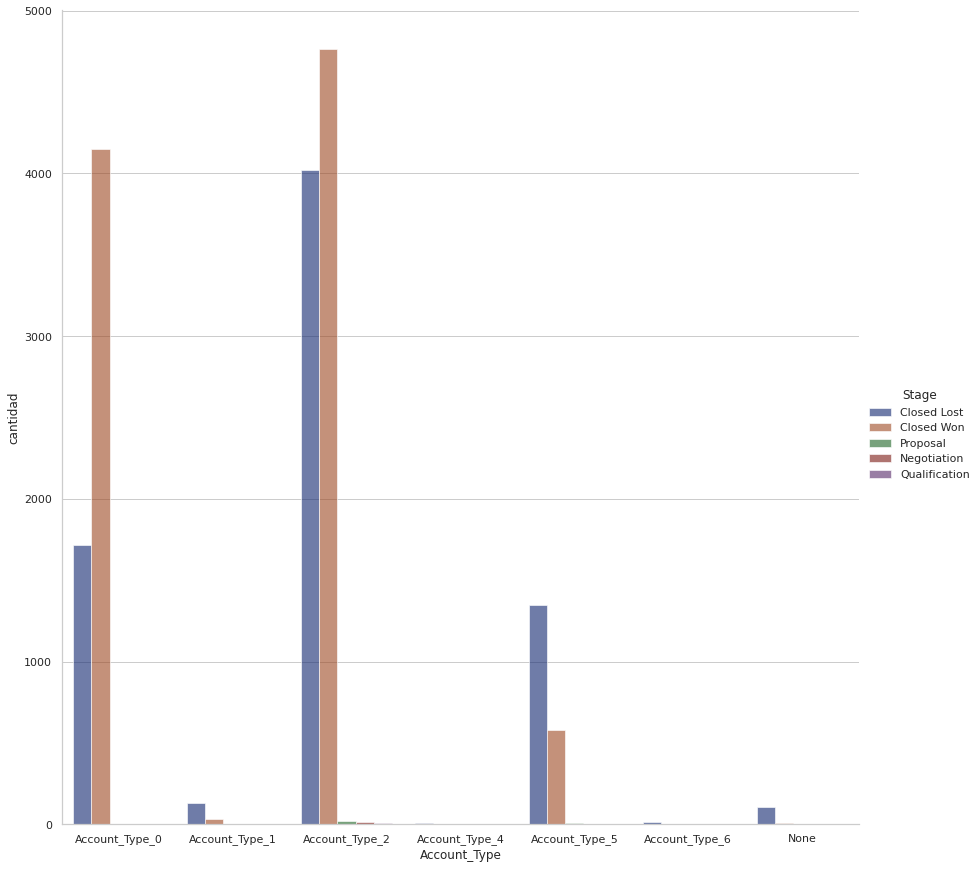

In [ ]:
#fig, ax = plt.subplots(figsize=(12,11))
 

 

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cuenta_estado, kind="bar",
    x="Account_Type", y="cantidad", hue="Stage",
    ci="sd", palette="dark", alpha=.6, height=12
)

#g.set_title("Cantidad de Estados por Tipo y Anio", fontsize=22)
#g.set_xlabel("Cantidad por Estado",fontsize=15)
#g.set_ylabel("Anio", fontsize=15)


g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

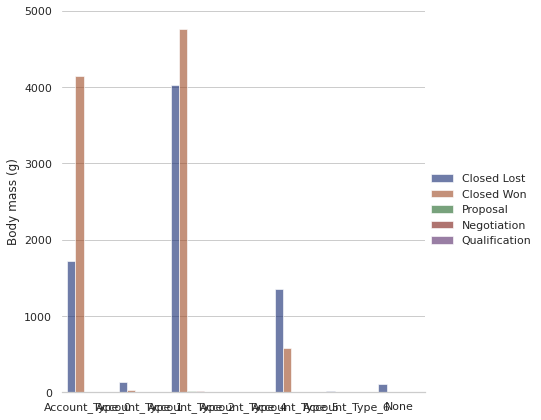

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
g=sns.lineplot(data=df2, x="anio", y="cant", hue="Stage",ax=ax)
g.set_title("Cantidad de Estados por Tipo y Anio", fontsize=22)
g.set_xlabel("Cantidad por Estado",fontsize=15)
g.set_ylabel("Anio", fontsize=15)

sns.set_theme(style="whitegrid")

penguins = sns.load_dataset("penguins")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=cuenta_estado, kind="bar",
    x="Account_Type", y="cantidad", hue="Stage",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

In [ ]:
l=account_stage.columns.to_list()

In [ ]:
g = sns.barplot(x=account_stage.Account_Type, y=account_stage.index,  hue=l,orient='h')
g.set_title("Canciones por Genero Principal", fontsize=15)
g.set_xlabel("Numero de canciones", fontsize=12)
g.set_ylabel("Genero", fontsize=12)

Exception: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(86.09375, 0.5, 'Tipo de Cuenta')

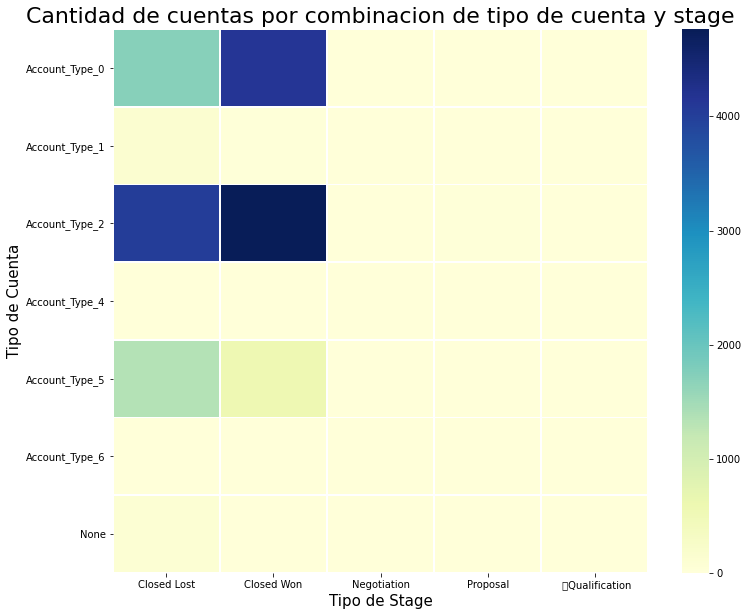

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(account_stage, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de cuentas por combinacion de tipo de cuenta y stage", fontsize=22)
g.set_xlabel("Tipo de Stage",fontsize=15)
g.set_ylabel("Tipo de Cuenta", fontsize=15)


In [ ]:
relacion=entrenamiento.groupby(['Account_Type','Territory']).agg(cantidadTerritorio=('Stage','count'))
relacion.columns=['cantidad_cuentas_territorio']
relacion.head()

cantidad_cuentas_territorio
Account_Type   Territory                                        
Account_Type_0 Australia                                     870
               Austria                                       139
               Belgium                                       133
               Bosnia & Herzegovina                            3
               Bulgaria                                        1

In [ ]:
relacion['account_territory_media']=relacion['cantidad_cuentas_territorio'].transform(lambda x: x> x.mean())

In [ ]:
acount_territory=relacion[relacion['account_territory_media']]
acount_territory.head()


cantidad_cuentas_territorio  account_territory_media
Account_Type   Territory                                                        
Account_Type_0 Australia                            870                     True
               Austria                              139                     True
               Belgium                              133                     True
               China (PRC)                          213                     True
               France                               127                     True

In [ ]:
acount_territory=acount_territory.reset_index()
acount_territory[['Account_Type','cantidad_cuentas_territorio']]

,Account_Type,cantidad_cuentas_territorio
0,Account_Type_0,870
1,Account_Type_0,139
2,Account_Type_0,133
3,Account_Type_0,213
4,Account_Type_0,127
5,Account_Type_0,928
6,Account_Type_0,110
7,Account_Type_0,248
8,Account_Type_0,464
9,Account_Type_0,109


TypeError: ignored

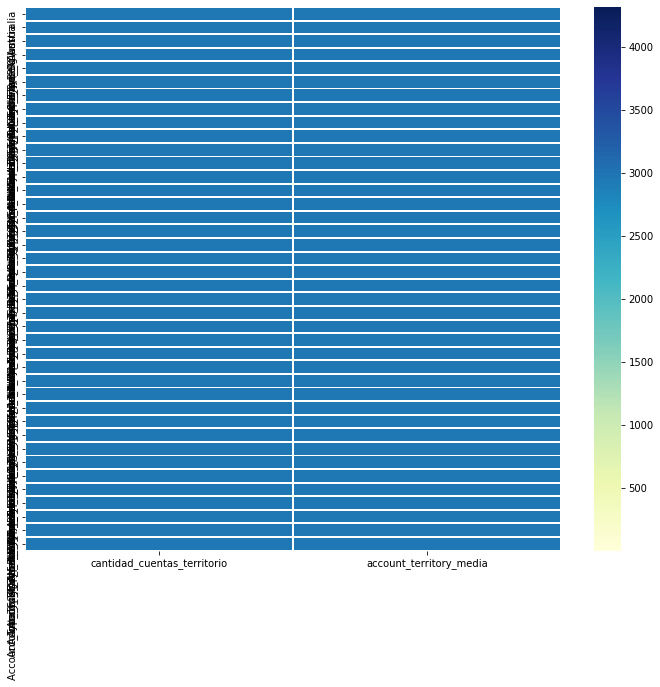

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(acount_territory, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)


,Account_Type,Territory,cantidad_cuentas_territorio,account_territory_media
0,Account_Type_0,Australia,870,True
1,Account_Type_0,Austria,139,True
2,Account_Type_0,Belgium,133,True
3,Account_Type_0,China (PRC),213,True
4,Account_Type_0,France,127,True
5,Account_Type_0,Germany,928,True
6,Account_Type_0,India,110,True
7,Account_Type_0,Italy,248,True
8,Account_Type_0,Japan,464,True
9,Account_Type_0,NE America,109,True


In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
entrenamiento[['Stage','Opportunity_Created_Date']]

KeyError: ignored

In [ ]:
df=entrenamiento[['Stage','Opportunity_Created_Date']]
df['opportunity_created_year']=pd.to_datetime(entrenamiento['Opportunity_Created_Date'])
df['year']=df['opportunity_created_year'].dt.year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


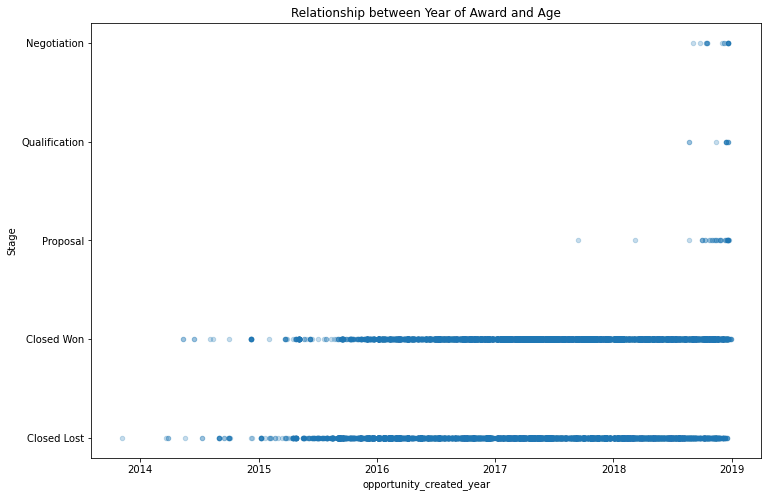

In [ ]:
df.plot.scatter('opportunity_created_year', 'Stage' , title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Stage                     16947 non-null  object        
 1   Opportunity_Created_Date  16947 non-null  object        
 2   opportunity_created_year  16947 non-null  datetime64[ns]
 3   year                      16947 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 529.7+ KB


Text(0, 0.5, 'BPM')

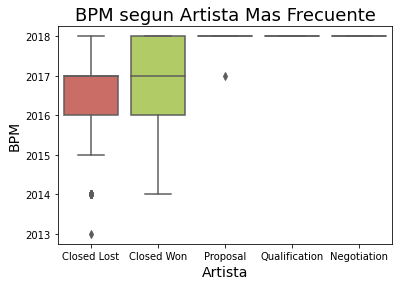

In [ ]:
g = sns.boxplot(x="Stage",y="year", 
                     data=df, palette="hls")
g.set_title("BPM segun Artista Mas Frecuente", fontsize=18)
g.set_xlabel("Artista", fontsize=14)
g.set_ylabel("BPM", fontsize=14)

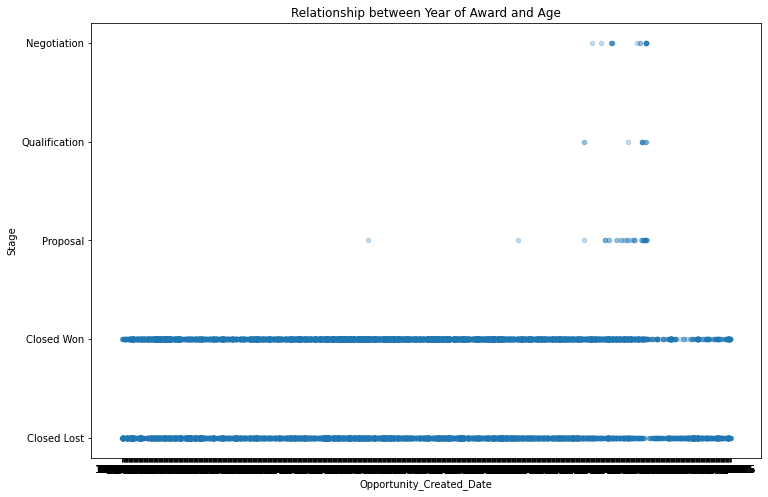

In [ ]:
entrenamiento.plot.scatter('Opportunity_Created_Date', 'Stage' , title='Relationship between Year of Award and Age',alpha=0.25,figsize=(12,8));

delibery terms y su relacion con stage

In [ ]:
entrenamiento['Opportunity_Created_Date ''Delivery_Terms'].value_counts()

KeyError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) )
g = sns.heatmap(acount_territory, ax=ax, linewidths=.9, cmap="YlGnBu") # annot=True
g.set_title("Cantidad de Proyectos por combinacion de Año y Mes", fontsize=22)
g.set_xlabel("Mes de Lanzamiento del Proyecto",fontsize=15)
g.set_ylabel("Año de Lanzamiento del Proyecto", fontsize=15)

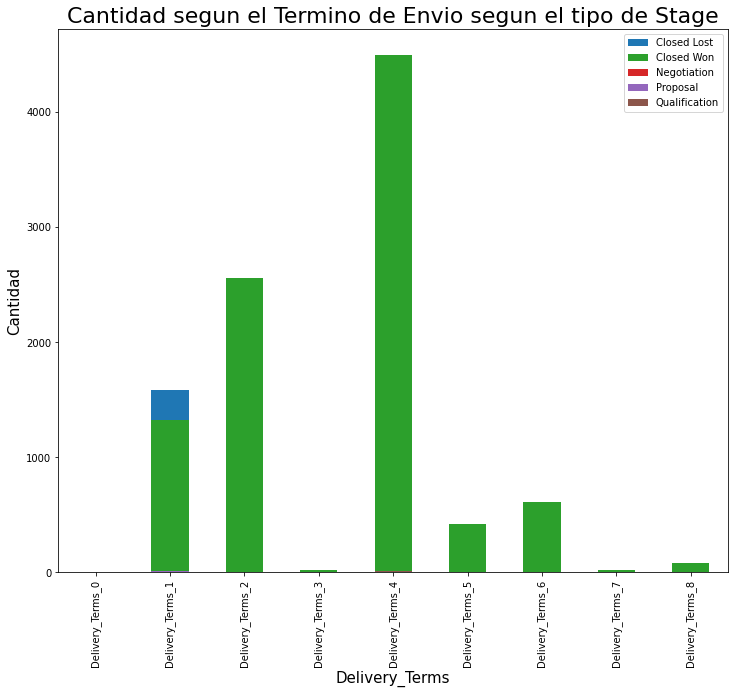

In [ ]:
fig, ax = plt.subplots(figsize=(12,10) ) 
ax = delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Lost", kind="bar", ax=ax)
ax.set_title("Cantidad segun el Termino de Envio segun el tipo de Stage", fontsize=22)
ax.set_xlabel("Stage",fontsize=15)
ax.set_ylabel("Cantidad", fontsize=15)  
delivery_terms_stage.plot(x="Delivery_Terms", y="Closed Won", kind="bar", ax=ax, color="C2")
delivery_terms_stage.plot(x="Delivery_Terms", y="Negotiation", kind="bar", ax=ax, color="C3")
delivery_terms_stage.plot(x="Delivery_Terms", y="Proposal", kind="bar", ax=ax, color="C4")
delivery_terms_stage.plot(x="Delivery_Terms", y="Qualification", kind="bar", ax=ax, color="C5")
 
plt.show()

In [ ]:
y = np.random.rand(10,4)
y[:,0]= np.arange(10)
df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

ax = df.plot(x="X", y="A", kind="bar")
df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12,11))
ax = pt.RainCloud(data = entrenamiento, x = 'Stage', y = 'ASP', 
                  orient='h',
                 bw=.8, ax=ax
                 )
sns.despine()


In [ ]:
entrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16947 non-null  int64  
 1   Region                              16947 non-null  object 
 2   Territory                           16947 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64  
 7   Submitted_for_Approval              16947 non-null  int64  
 8   Bureaucratic_Code                   16947 non-null  object 
 9   Account_Created_Date                16947 non-null  object 
 10  Source                              16947 non-null  object 
 11  Billing_Country                     16947

In [ ]:
entrenamiento['Account_Name'].value_counts()

Account_Name_1888    2124
Account_Name_1836     886
Account_Name_25       752
Account_Name_1991     586
Account_Name_1642     397
                     ... 
Account_Name_1960       1
Account_Name_1718       1
Account_Name_343        1
Account_Name_819        1
Account_Name_310        1
Name: Account_Name, Length: 1635, dtype: int64

In [ ]:
entrenamiento['Pricing, Delivery_Terms_Approved'].value_counts()

1    9890
0    7057
Name: Pricing, Delivery_Terms_Approved, dtype: int64

In [ ]:
entrenamiento.groupby(['Account_Name','Pricing, Delivery_Terms_Approved']).agg(cant=('Stage','count')).nlargest(10,'cant')

cant
Account_Name      Pricing, Delivery_Terms_Approved      
Account_Name_1888 0                                 1088
                  1                                 1036
Account_Name_1836 1                                  802
Account_Name_1991 1                                  488
Account_Name_25   1                                  455
Account_Name_1508 1                                  340
Account_Name_25   0                                  297
Account_Name_1642 1                                  246
Account_Name_1440 1                                  214
Account_Name_931  1                                  188

In [ ]:
entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Account_Name','Stage']).agg(cant=('Stage','count')).nlargest(20,'cant')

,,cant
Account_Name,Stage,
Account_Name_1888,Closed Won,1018
Account_Name_1836,Closed Won,795
Account_Name_25,Closed Won,539
Account_Name_1991,Closed Won,520
Account_Name_1508,Closed Won,323
Account_Name_1440,Closed Won,267
Account_Name_263,Closed Won,205
Account_Name_1642,Closed Won,204
Account_Name_931,Closed Won,203


In [ ]:
#Europa, Oriente Medio y África.
entrenamiento.groupby(['Account_Name','Region']).agg(cant=('Stage','count')).nlargest(20,'cant')

,,cant
Account_Name,Region,
Account_Name_1888,Japan,2124
Account_Name_1836,Japan,886
Account_Name_25,Americas,752
Account_Name_1991,Japan,586
Account_Name_1642,APAC,397
Account_Name_1508,Japan,355
Account_Name_1440,APAC,317
Account_Name_533,EMEA,283
Account_Name_263,EMEA,249


In [ ]:
ka=entrenamiento.groupby(['Region','Account_Name']).agg(cant=('Stage','count')).nlargest(20,'cant').groupby(['Region','Account_Name'],level='Region')

In [ ]:
#for key, item in ka:
#    print(ka.get_group(key), "\n\n")

In [ ]:
z=entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.nlargest(20,'cant').reset_index()
z



,Region,Account_Name,cant
0,Japan,Account_Name_1888,1018
1,Japan,Account_Name_1836,795
2,Americas,Account_Name_25,539
3,Japan,Account_Name_1991,520
4,Japan,Account_Name_1508,323
5,APAC,Account_Name_1440,267
6,EMEA,Account_Name_263,205
7,APAC,Account_Name_1642,204
8,APAC,Account_Name_931,203
9,EMEA,Account_Name_533,190


In [ ]:
sns.scatterplot(z, x="Account_Name", y="Region")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
entrenamiento['acount_amount_mayor_media']=entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.reset_index().groupby('Region')['cant'].transform(lambda x: x>x.mean())

In [ ]:
entrenamiento['acount_amount_mayor_media'].value_counts()

False    556
True     115
Name: acount_amount_mayor_media, dtype: int64

In [ ]:
entrenamiento.loc[entrenamiento['acount_amount_mayor_media']==True,:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\


cant
Region   Account_Name           
APAC     Account_Name_1041     1
         Account_Name_1394     1
         Account_Name_1440     2
         Account_Name_1920     1
         Account_Name_461      1
         Account_Name_993      1
Americas Account_Name_1159     1
         Account_Name_1226     1
         Account_Name_1428     1
         Account_Name_1547     1
         Account_Name_1662     1
         Account_Name_1794     1
         Account_Name_1808     1
         Account_Name_1866     1
         Account_Name_1925     1
         Account_Name_217      1
         Account_Name_961      3
EMEA     Account_Name_1274     1
         Account_Name_1374     1
         Account_Name_1459     1
         Account_Name_1826     1
         Account_Name_2021     2
         Account_Name_2060     1
         Account_Name_446      1
         Account_Name_459      1
         Account_Name_533      3
         Account_Name_59       1
         Account_Name_673      1
         Account_Name_686      2
         Account_Name_951      1
Japan    Account_Name_1522     3
         Account_Name_1836     1
         Account_Name_1888    71
         Account_Name_1991     3

In [ ]:
entrenamiento.loc[entrenamiento['Stage']=='Closed Won',:].groupby(['Region','Account_Name']).agg(cant=('Account_Name','count'))\
.nlargest(20,'cant').reset_index()


,Region,Account_Name,cant
0,Japan,Account_Name_1888,1018
1,Japan,Account_Name_1836,795
2,Americas,Account_Name_25,539
3,Japan,Account_Name_1991,520
4,Japan,Account_Name_1508,323
5,APAC,Account_Name_1440,267
6,EMEA,Account_Name_263,205
7,APAC,Account_Name_1642,204
8,APAC,Account_Name_931,203
9,EMEA,Account_Name_533,190


In [ ]:
entrenamiento['Region'].value_counts()

Japan          4892
EMEA           4664
Americas       3945
APAC           3262
Middle East     184
Name: Region, dtype: int64